# Kat E3.5 - E4.5 velocity

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scvelo as scv
import matplotlib.pyplot as plt

from matplotlib import rcParams

random_seed = 12345
np.random.seed(random_seed)
sc.settings.set_figure_params(dpi=80)

scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.settings.set_figure_params('scvelo')  # for beautified visualization

rcParams['figure.figsize'] = 7, 7
%matplotlib inline

## Visuals

In [2]:
adata = sc.read('../data/processed/kat-replicated.h5')
adata_velocity = sc.read('../data/processed/03_merged_velocity.h5ad')


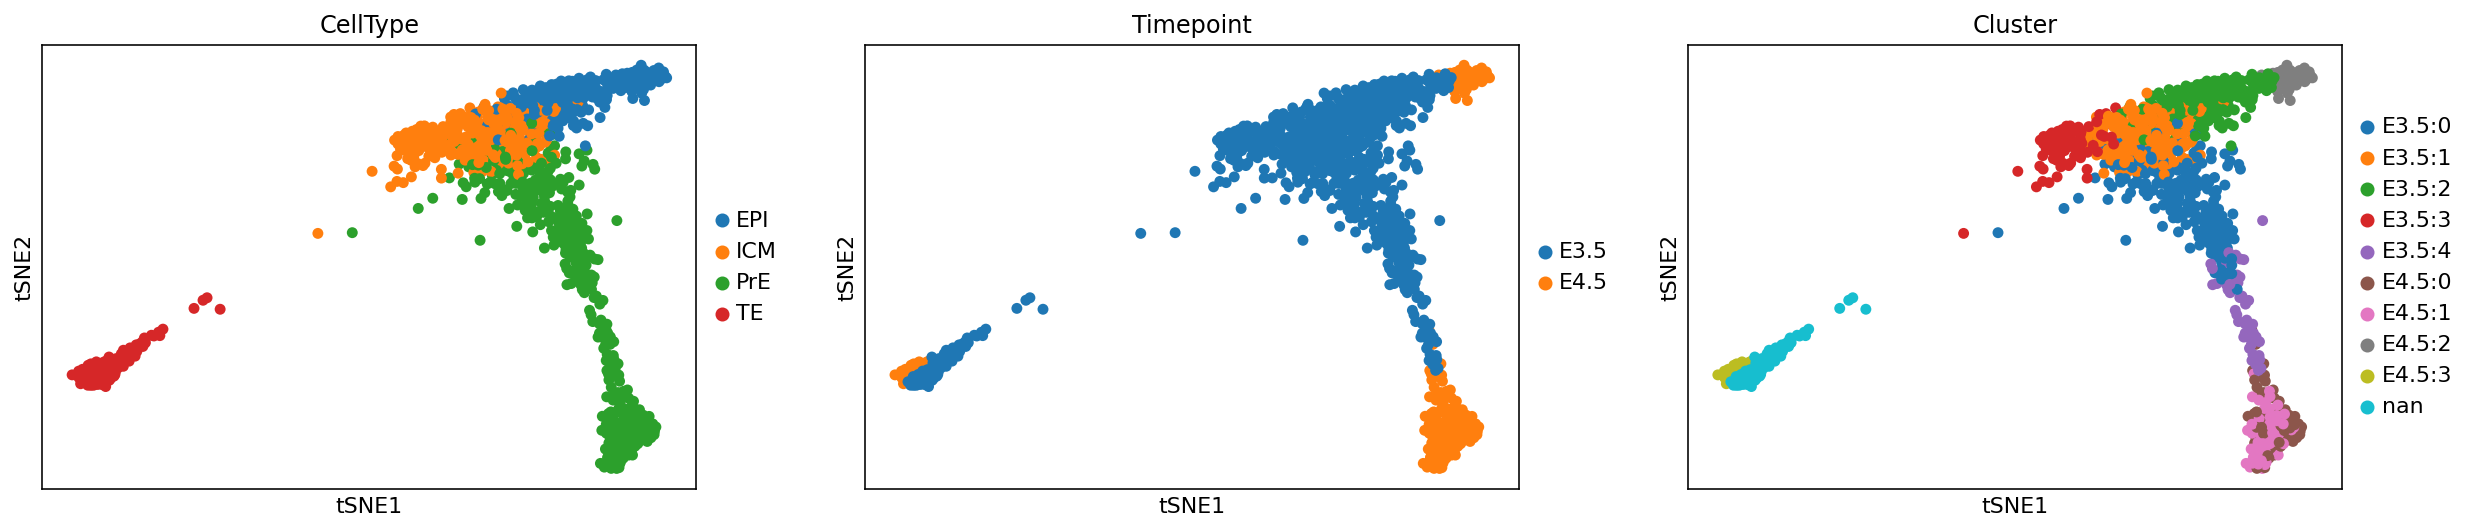

In [3]:
sc.pl.tsne(adata, color=['CellType', 'Timepoint', 'Cluster'])

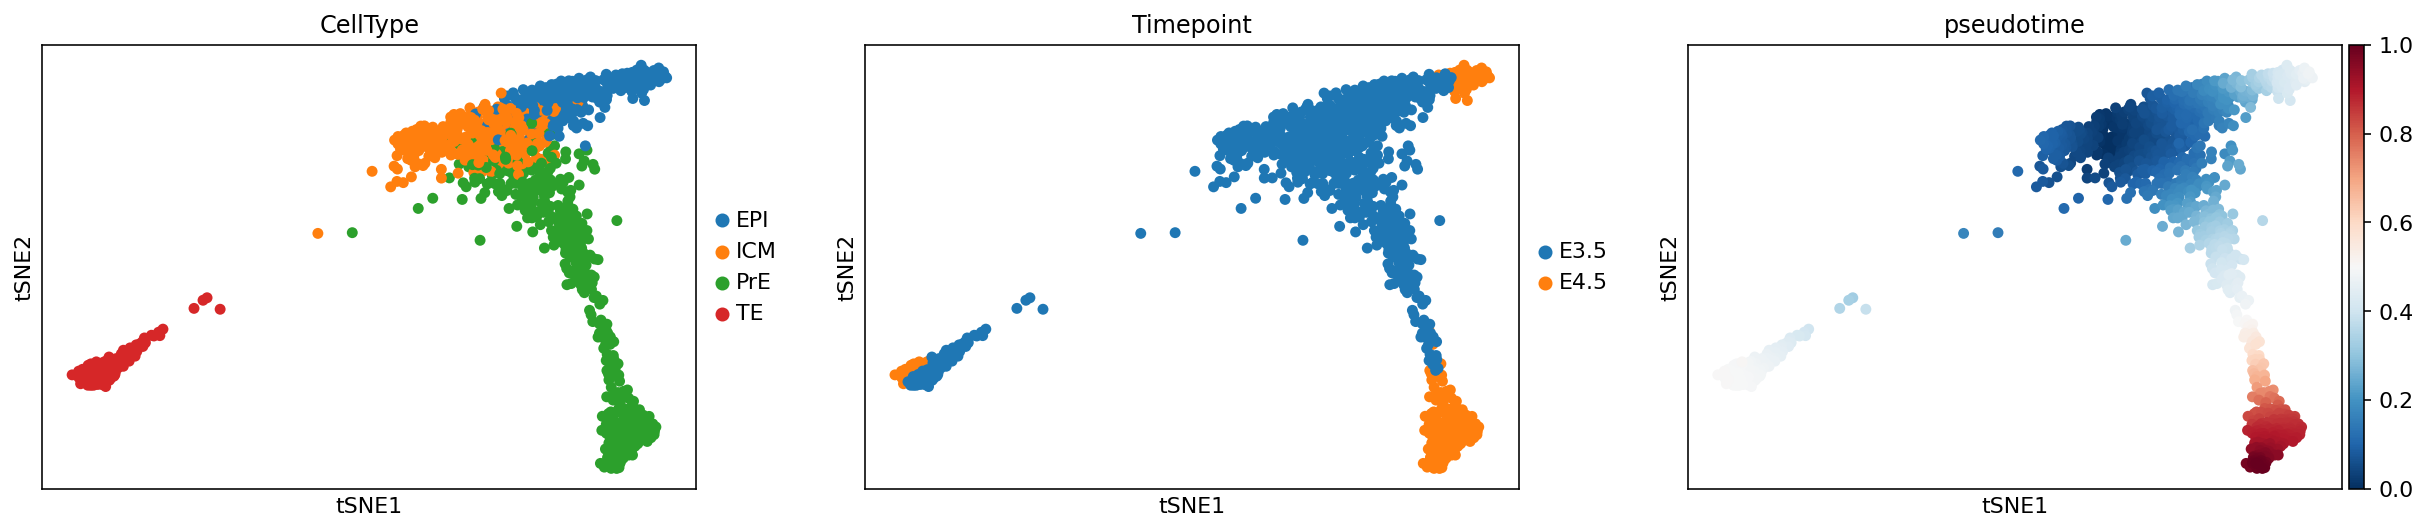

In [4]:
sc.pl.tsne(adata, color=['CellType', 'Timepoint', 'pseudotime'])

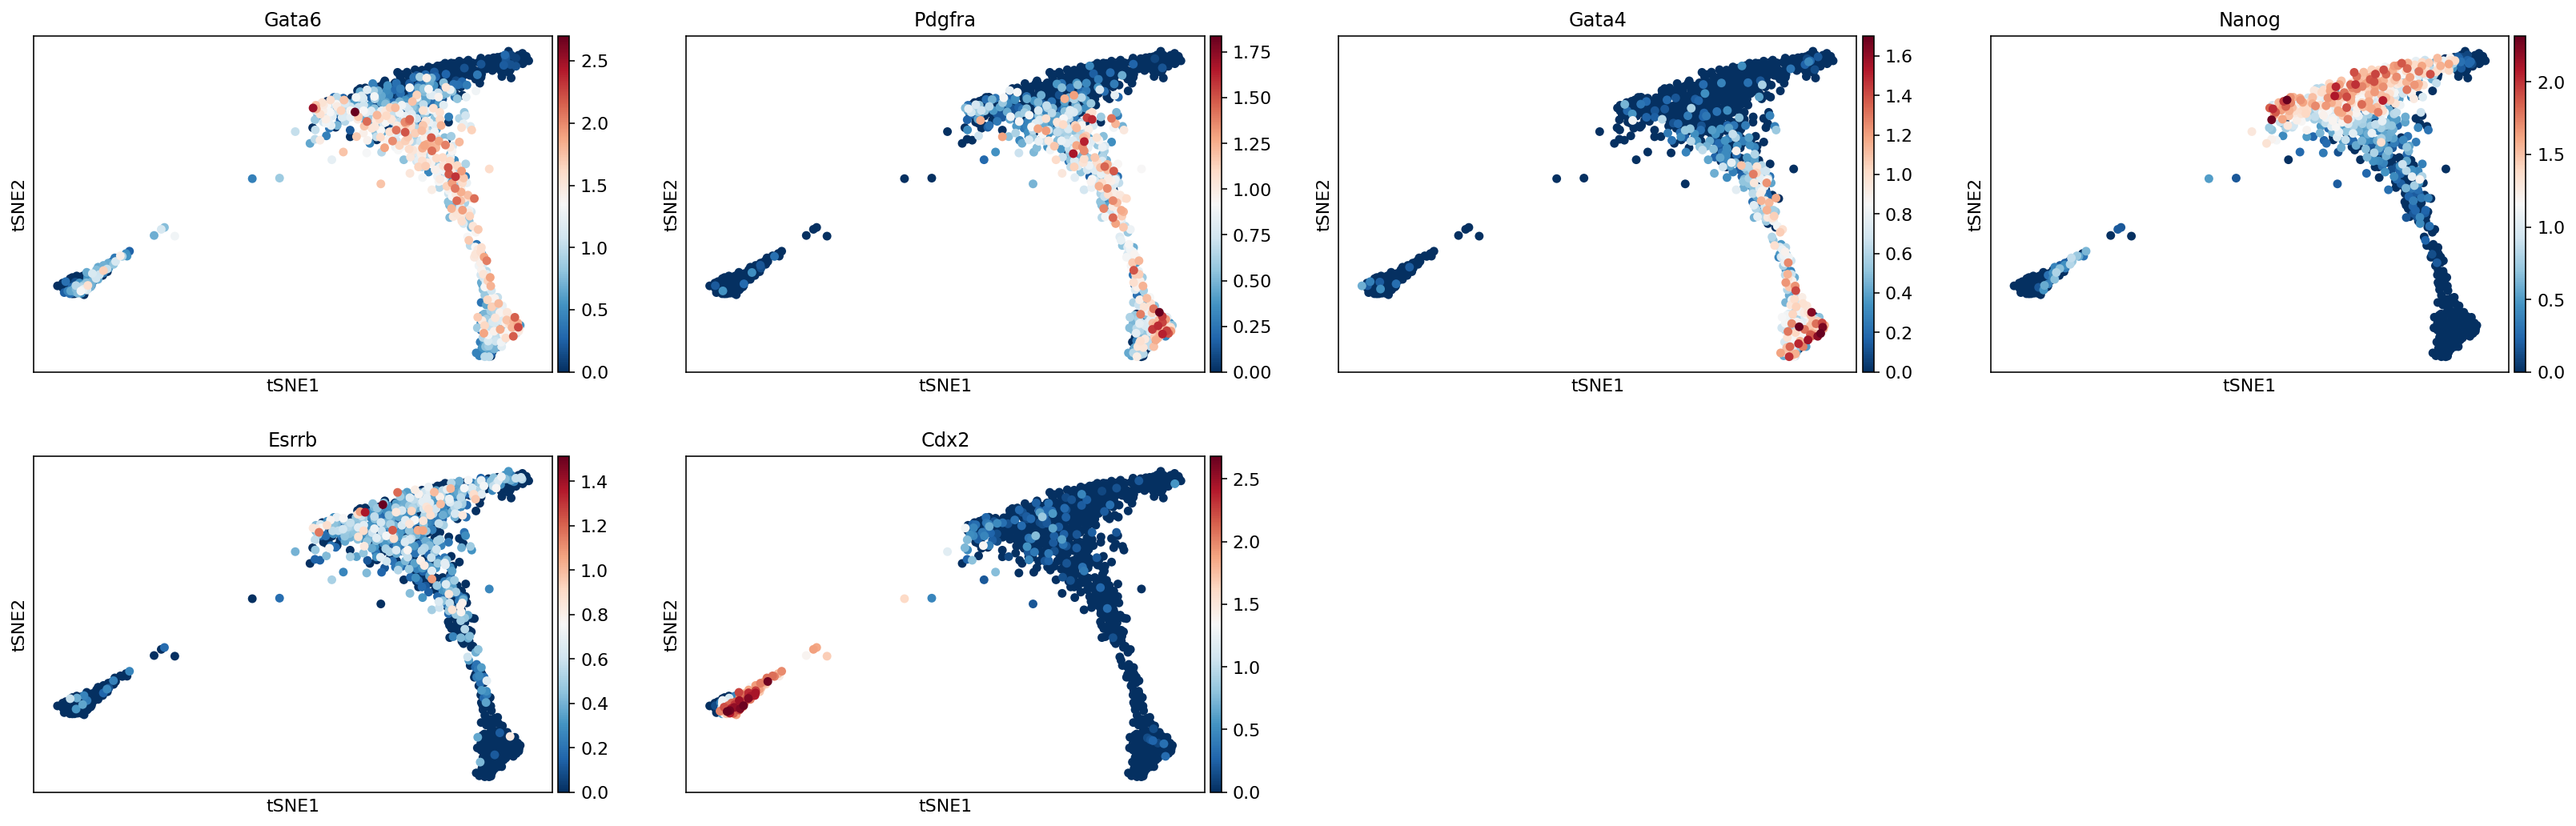

In [5]:
#kwargs = dict(alpha = 0.1, marker = 11)
sc.pl.tsne(adata, color=['Gata6', 'Pdgfra', 'Gata4', 'Nanog', 'Esrrb', 'Cdx2']) #, **kwargs

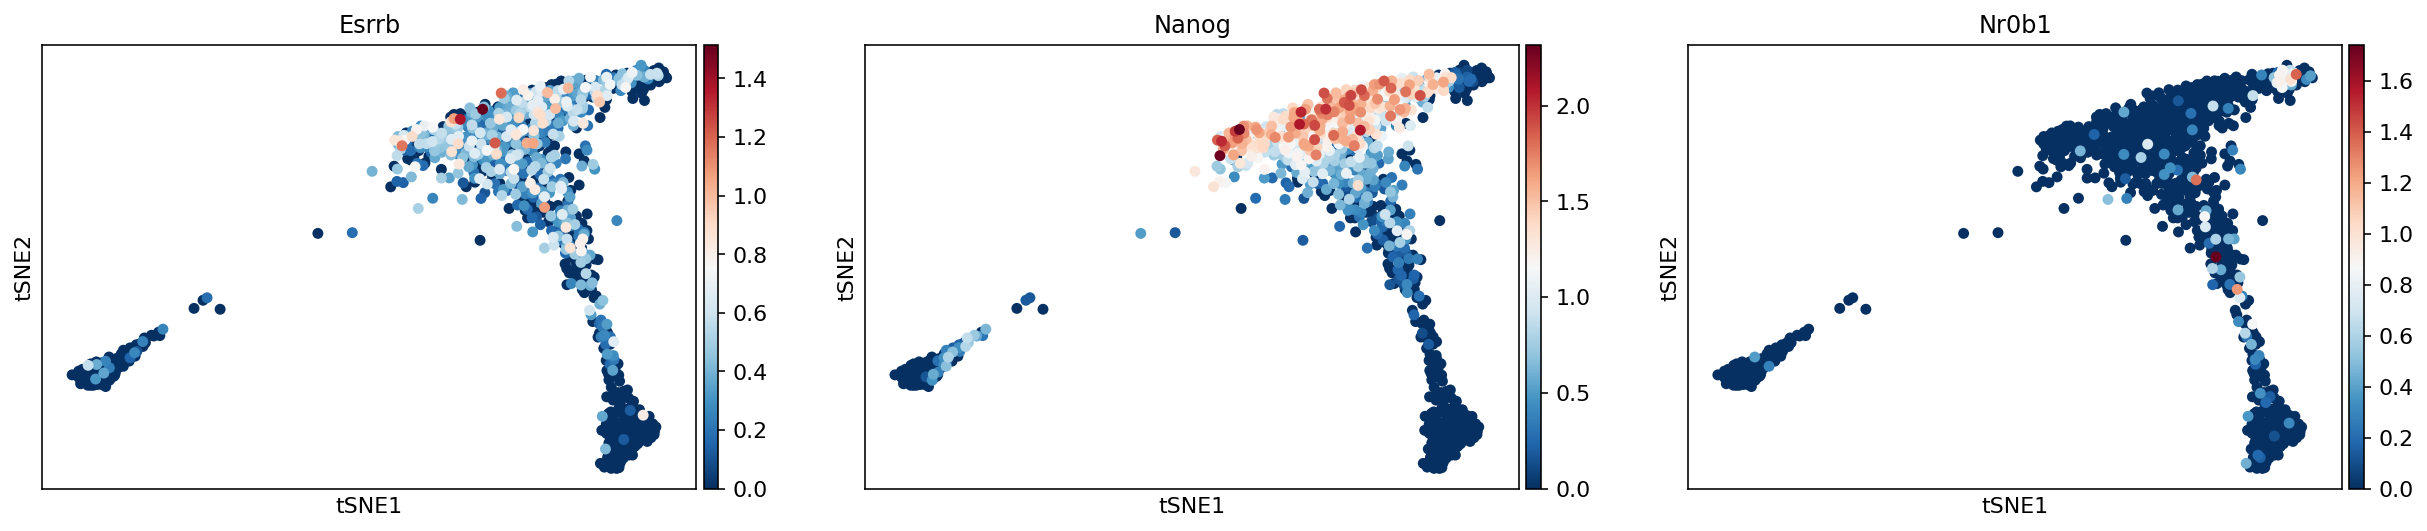

In [5]:
#kwargs = dict(alpha = 0.1, marker = 11)
sc.pl.tsne(adata, color=['Esrrb', 'Nanog', 'Nr0b1']) #, **kwargs

In [6]:
adata.obs['Time_CellType'] = adata.obs.CellType.astype(str) + "-" + adata.obs.Timepoint.astype(str)
adata.obs['Time_CellType'] = adata.obs['Time_CellType'].astype('category')

In [7]:
sc.tl.rank_genes_groups(adata, groupby="Time_CellType", n_genes=400)

In [8]:
adata_gata4 = adata[adata[: , 'Gata4'].X > 0.7, :] 
adata_gata4_6 = adata_gata4[adata_gata4[: , 'Gata6'].X > 1, :]
adata_gata4_6_pdgfra = adata_gata4_6[adata_gata4_6[: , 'Pdgfra'].X > 0.75, :] 

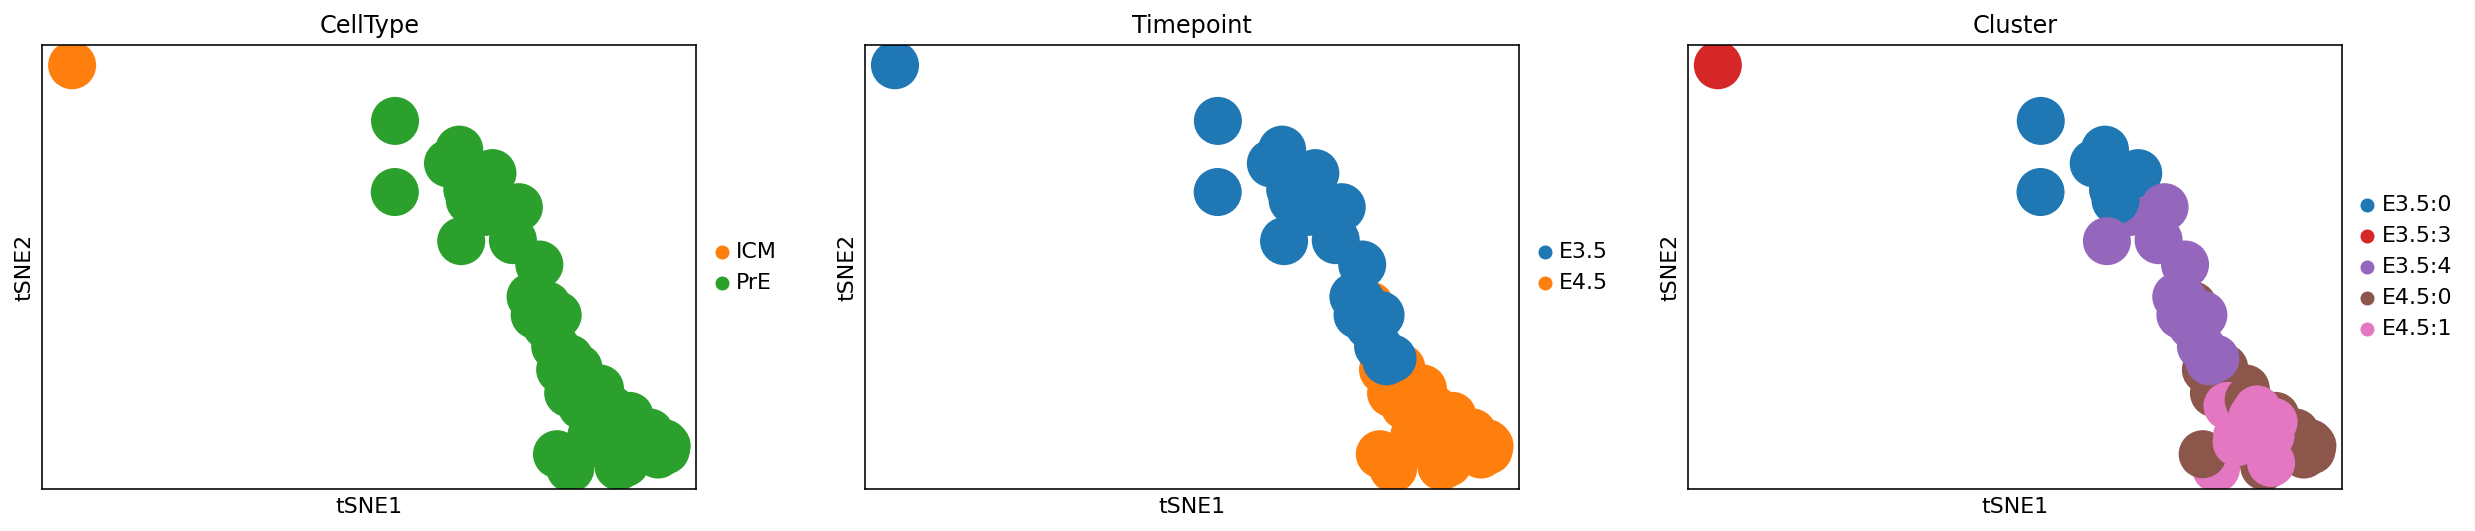

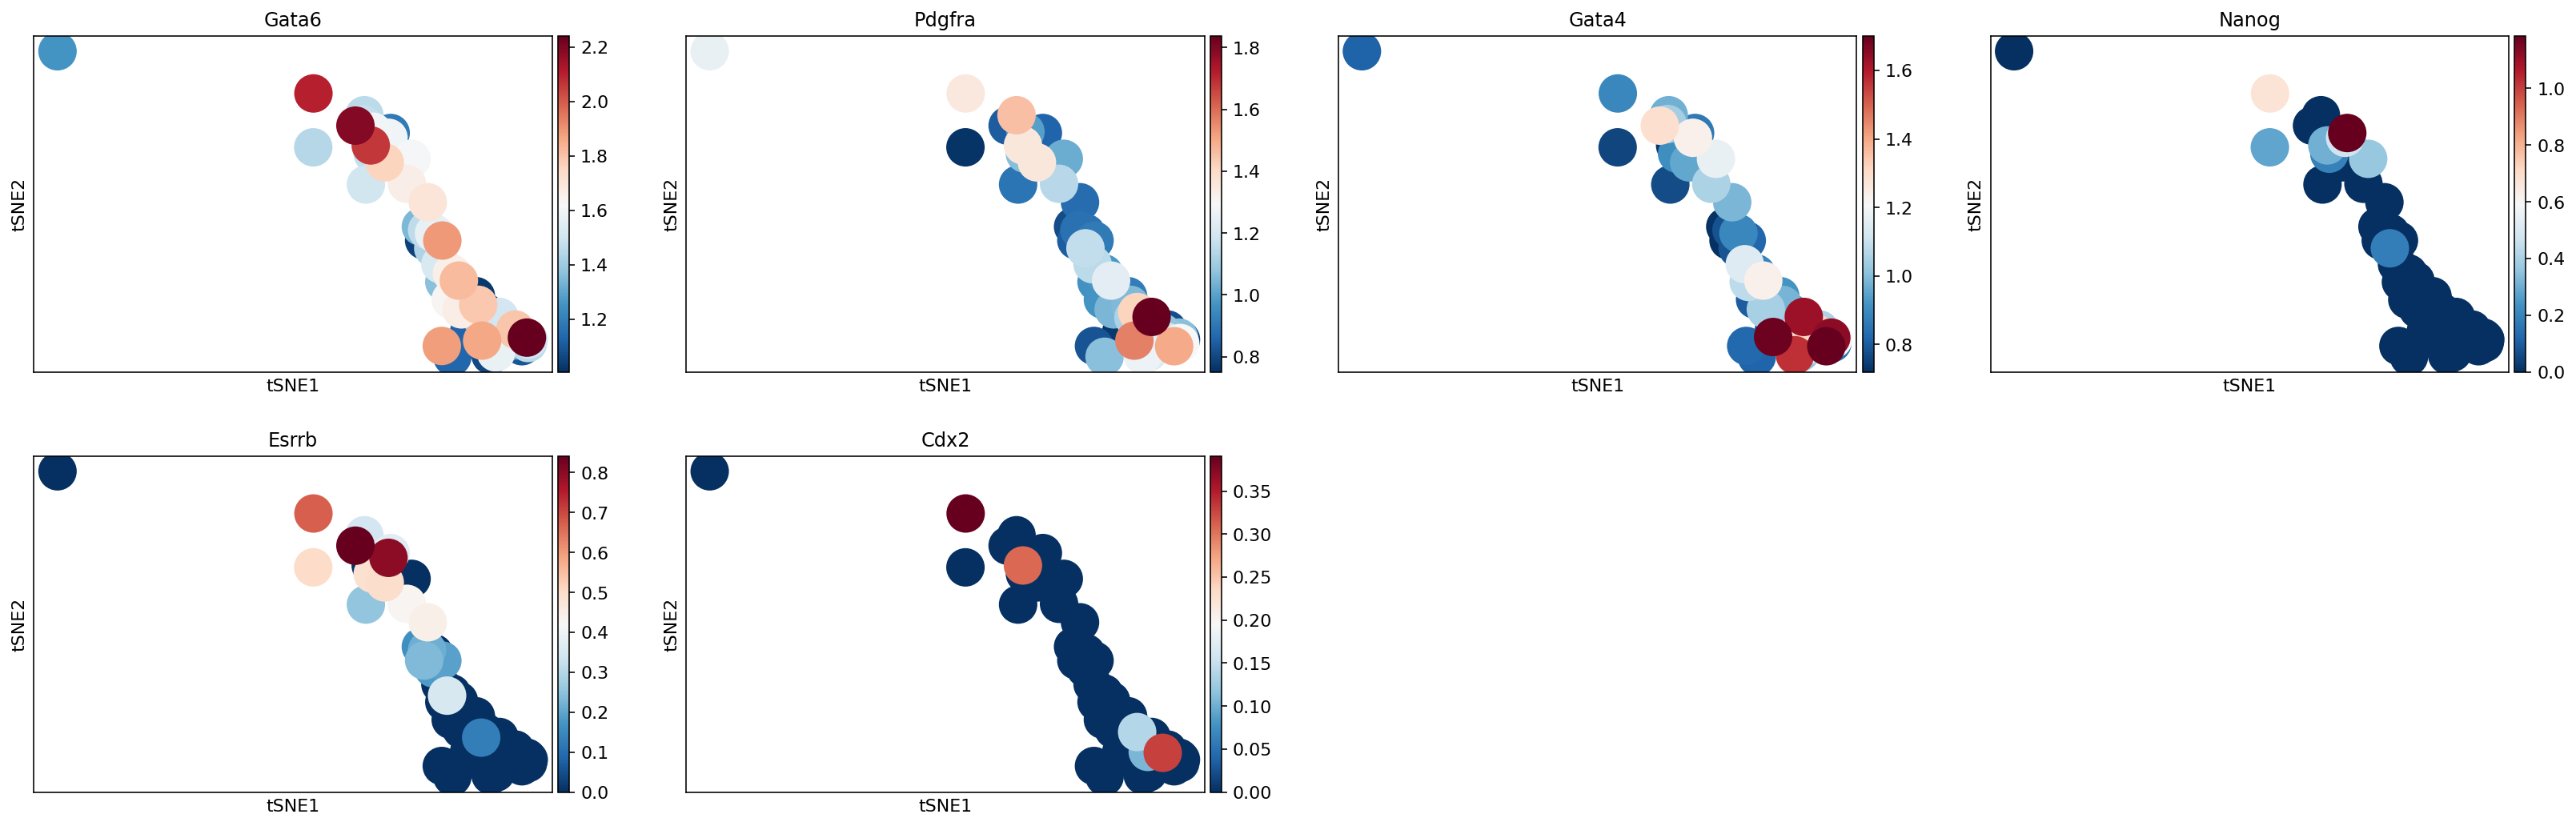

In [9]:
sc.pl.tsne(adata_gata4_6_pdgfra, color=['CellType', 'Timepoint', 'Cluster'])
sc.pl.tsne(adata_gata4_6_pdgfra, color=['Gata6', 'Pdgfra', 'Gata4', 'Nanog', 'Esrrb', 'Cdx2'])

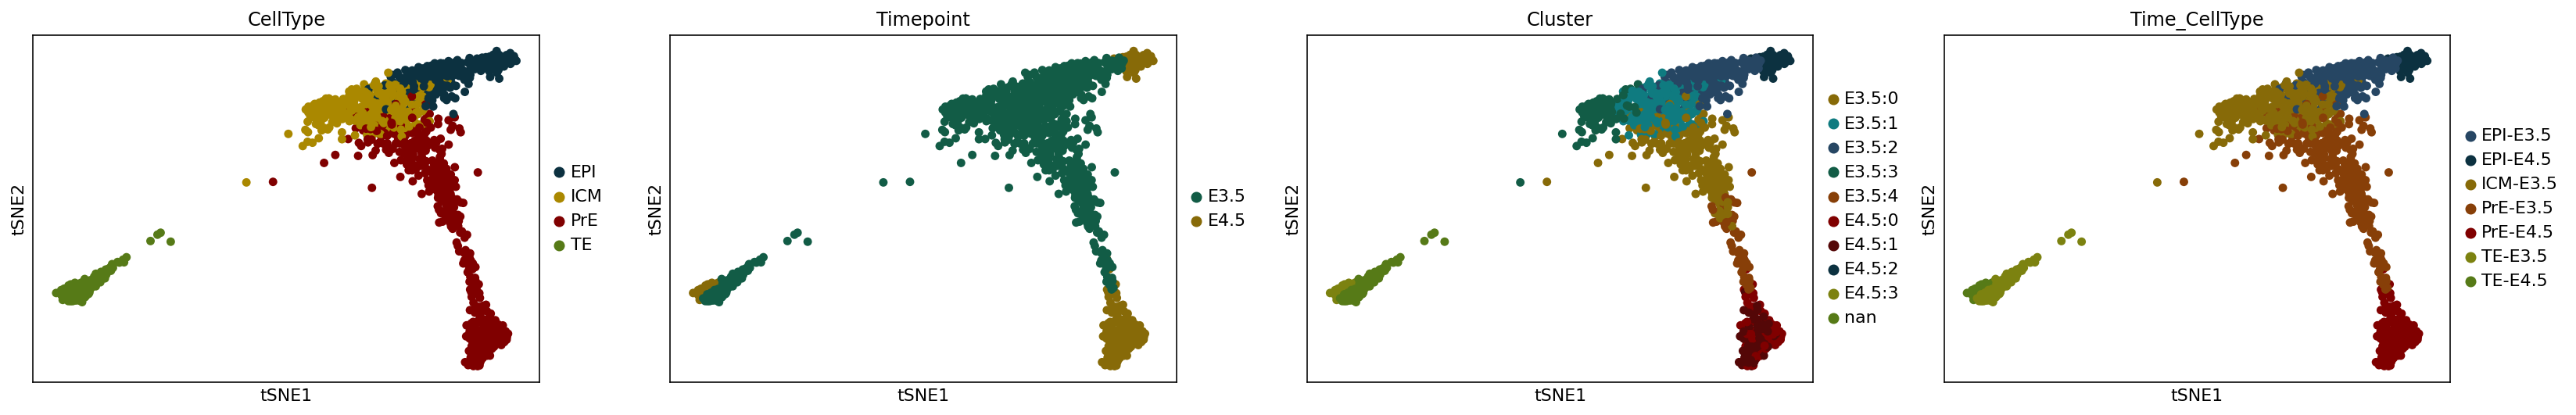

In [10]:
adata.uns['CellType_colors'] = ['#0c3140','#aa8800','#800000', '#567a17']
adata.uns['Cluster_colors'] = ['#876a08','#0f7b80','#264663', '#125c46','#873f08','#800000','#540707','#0c3140','#7c8210','#567a17']
adata.uns['Timepoint_colors'] = ['#125c46','#876a08']
adata.uns['Time_CellType_colors'] = ['#264663','#0c3140','#876a08','#873f08','#800000','#7c8210','#567a17']

sc.pl.tsne(adata, color=['CellType', 'Timepoint', 'Cluster','Time_CellType'])

#'#007b80'
#'#567a17' '#628000'

### Velocity

In [11]:
print(f"Before {adata.shape}\nAfter {adata_velocity.shape}")

Before (1006, 20897)
After (991, 19835)


In [12]:
adata_velocity.obs['Time_CellType'] = adata_velocity.obs.CellType.astype(str) + "-" + adata_velocity.obs.Timepoint.astype(str)
adata_velocity.obs['Time_CellType'] = adata_velocity.obs['Time_CellType'].astype('category')

adata_velocity.obs['Cluster_CellType'] = adata_velocity.obs.CellType.astype(str) + "-" + adata_velocity.obs.Cluster.astype(str)
adata_velocity.obs['Cluster_CellType'] = adata_velocity.obs['Cluster_CellType'].astype('category')

In [13]:
adata_velocity.obs

Cluster Timepoint CellType  pseudotime  \
TTTATGCTCAGCTGGC-0  E3.5:0      E3.5      PrE    0.214210   
TTTATGCTCGCGGATC-0  E3.5:0      E3.5      PrE    0.118293   
TTTACTGAGAAACCAT-0  E3.5:1      E3.5      ICM    0.068001   
TTTGTCAGTCAAACTC-0  E3.5:3      E3.5      ICM    0.066919   
TTATGCTCACCCAGTG-0  E3.5:2      E3.5      EPI    0.089352   
...                    ...       ...      ...         ...   
CCATTCGTCTATGTGG-1  E4.5:1      E4.5      PrE    0.837334   
CCAATCCTCGGAGCAA-1  E4.5:3      E4.5       TE    0.495723   
CCGTGGAGTTCGTGAT-1  E4.5:1      E4.5      PrE    0.998262   
CCCATACCACCCATGG-1  E4.5:1      E4.5      PrE    0.990573   
CCCAATCTCGTAGGAG-1  E4.5:0      E4.5      PrE    0.681008   

                    initial_size_spliced  initial_size_unspliced  \
TTTATGCTCAGCTGGC-0               36628.0                  5779.0   
TTTATGCTCGCGGATC-0               35641.0                  4589.0   
TTTACTGAGAAACCAT-0               20008.0                  2454.0   
TTTGTCAGTCAAACTC-0               27079.0                  5816.0   
TTATGCTCACCCAGTG-0               39108.0                  3694.0   
...                                  ...                     ...   
CCATTCGTCTATGTGG-1               41580.0                  6834.0   
CCAATCCTCGGAGCAA-1               43545.0                  3653.0   
CCGTGGAGTTCGTGAT-1               56812.0                  6534.0   
CCCATACCACCCATGG-1               44249.0                  7580.0   
CCCAATCTCGTAGGAG-1               32311.0                  3715.0   

                    initial_size batch Time_CellType Cluster_CellType  
TTTATGCTCAGCTGGC-0       47748.0     0      PrE-E3.5       PrE-E3.5:0  
TTTATGCTCGCGGATC-0       46485.0     0      PrE-E3.5       PrE-E3.5:0  
TTTACTGAGAAACCAT-0       25439.0     0      ICM-E3.5       ICM-E3.5:1  
TTTGTCAGTCAAACTC-0       35901.0     0      ICM-E3.5       ICM-E3.5:3  
TTATGCTCACCCAGTG-0       51108.0     0      EPI-E3.5       EPI-E3.5:2  
...                          ...   ...           ...              ...  
CCATTCGTCTATGTGG-1       59096.0     1      PrE-E4.5       PrE-E4.5:1  
CCAATCCTCGGAGCAA-1       61453.0     1       TE-E4.5        TE-E4.5:3  
CCGTGGAGTTCGTGAT-1       80127.0     1      PrE-E4.5       PrE-E4.5:1  
CCCATACCACCCATGG-1       61972.0     1      PrE-E4.5       PrE-E4.5:1  
CCCAATCTCGTAGGAG-1       45128.0     1      PrE-E4.5       PrE-E4.5:0  

[991 rows x 10 columns]

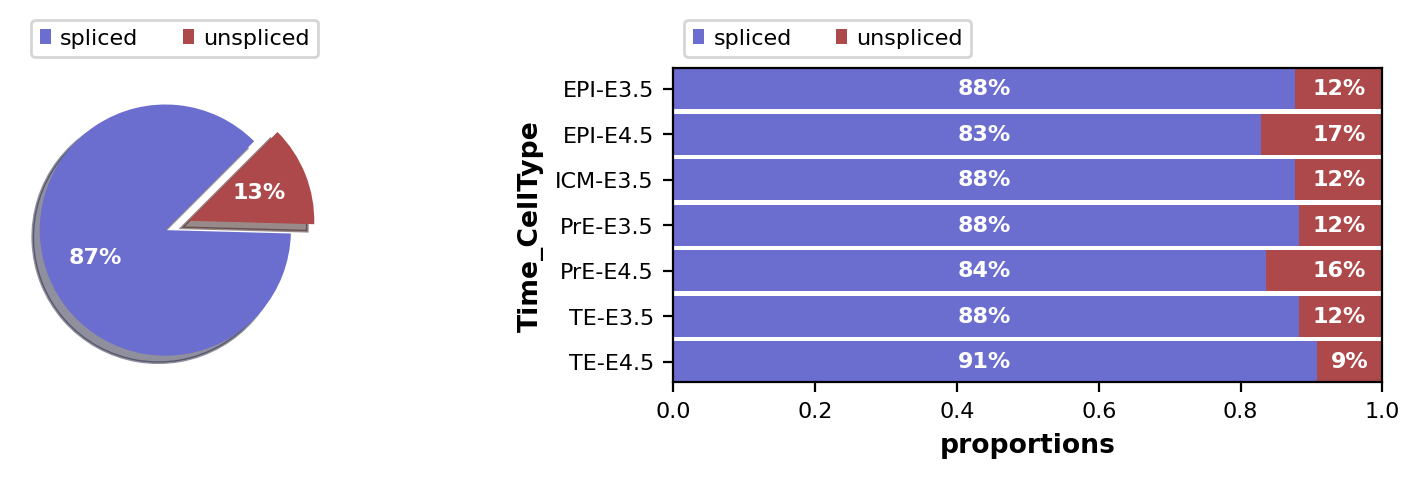

In [14]:
scv.pl.proportions(adata_velocity, groupby="Time_CellType")

In [15]:
#Subset here to run velocity on the individual lineages rather than global
#PrE
#adata_velocity = adata_velocity[adata_velocity.obs.Cluster.isin(["E3.5:0", "E3.5:4", "E4.5:0", "E4.5:1"])].copy()
#adata_velocity = adata_velocity[adata_velocity.obs.Cluster.isin(["E3.5:1","E3.5:0", "E3.5:4", "E4.5:0", "E4.5:1"])].copy()

#Epi
#adata_velocity = adata_velocity[adata_velocity.obs.Cluster.isin(["E3.5:1", "E3.5:2", "E4.5:2"])].copy()

#TE
#adata_velocity = adata_velocity[adata_velocity.obs.Cluster.isin(["E3.5:1", "E3.5:3", "E4.5:3", "nan"])].copy()

In [16]:
scv.pp.filter_and_normalize(adata_velocity, min_shared_counts=20, n_top_genes=2_000)
scv.pp.moments(adata_velocity, n_pcs=30, n_neighbors=30)

Filtered out 11991 genes that are detected 20 counts (shared).
Normalized count data: spliced, unspliced.
Extracted 2000 highly variable genes.
computing neighbors
    finished (0:00:07) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [17]:
scv.tl.recover_dynamics(adata_velocity, n_jobs=6)

recovering dynamics (using 6/12 cores)


  0%|          | 0/1216 [00:00<?, ?gene/s]

    finished (0:00:50) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [18]:
scv.tl.velocity(adata_velocity, mode='dynamical')
scv.tl.velocity_graph(adata_velocity)

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/12 cores)


  0%|          | 0/991 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [19]:
adata_velocity.uns['CellType_colors'] = ['#0c3140','#aa8800','#800000', '#567a17']
adata_velocity.uns['Cluster_colors'] = ['#876a08','#0f7b80','#264663', '#125c46','#873f08','#800000','#540707','#0c3140','#7c8210','#567a17']
adata_velocity.uns['Timepoint_colors'] = ['#125c46','#876a08']
adata_velocity.uns['Time_CellType_colors'] = ['#264663','#0c3140','#876a08','#873f08','#800000','#7c8210','#567a17']
adata_velocity.uns['Cluster_CellType_colors'] = ['#264663','#0c3140','#0f7b80', '#125c46','#876a08','#873f08','#800000','#540707','#7c8210','#567a17']


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_tsne', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo_cluster_timepoint.svg


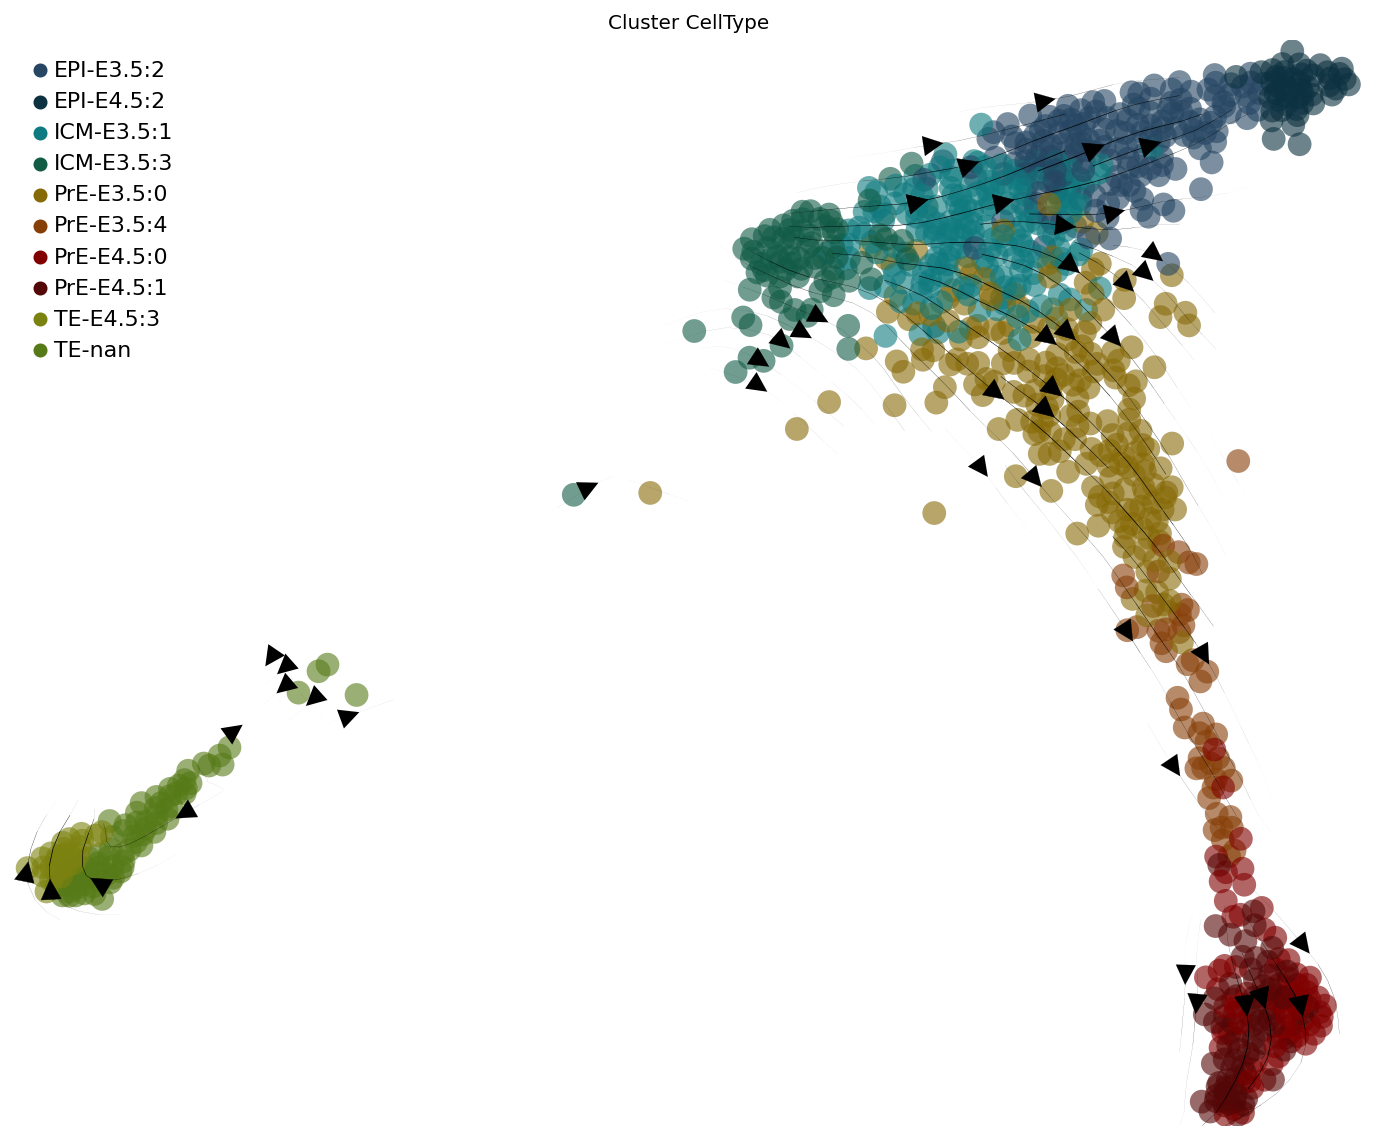

In [20]:
#scv.pl.velocity_embedding_stream(adata_velocity, basis='tsne', color='CellType', legend_loc ='right margin', arrow_color ='black')
#scv.pl.velocity_embedding_stream(adata_velocity, basis='tsne', color='Timepoint', legend_loc ='right margin')
#scv.pl.velocity_embedding_stream(adata_velocity, basis='tsne', color='Cluster', legend_loc ='right margin')
#scv.pl.velocity_embedding_stream(adata_velocity, basis='tsne', color='Time_CellType', legend_loc ='right margin')
scv.pl.velocity_embedding_stream(adata_velocity, basis='tsne', color='Cluster_CellType', alpha = 0.6, density = (2), arrow_size = 2.5, save = 'cluster_timepoint.svg', figsize=[15,12], legend_loc = "upper left", linewidth = 0.3)
#scv.pl.velocity_embedding_stream(adata_velocity, basis='tsne', color='Cluster_CellType', density = 2, size = 750, legend_loc ='upper left', legend_fontsize = 12, save = 'cluster_timepoint.svg', figsize=[10,10])


In [26]:
# ?scv.pl.velocity_embedding_stream

saving figure to file ./figures/scvelo_dev_time.svg


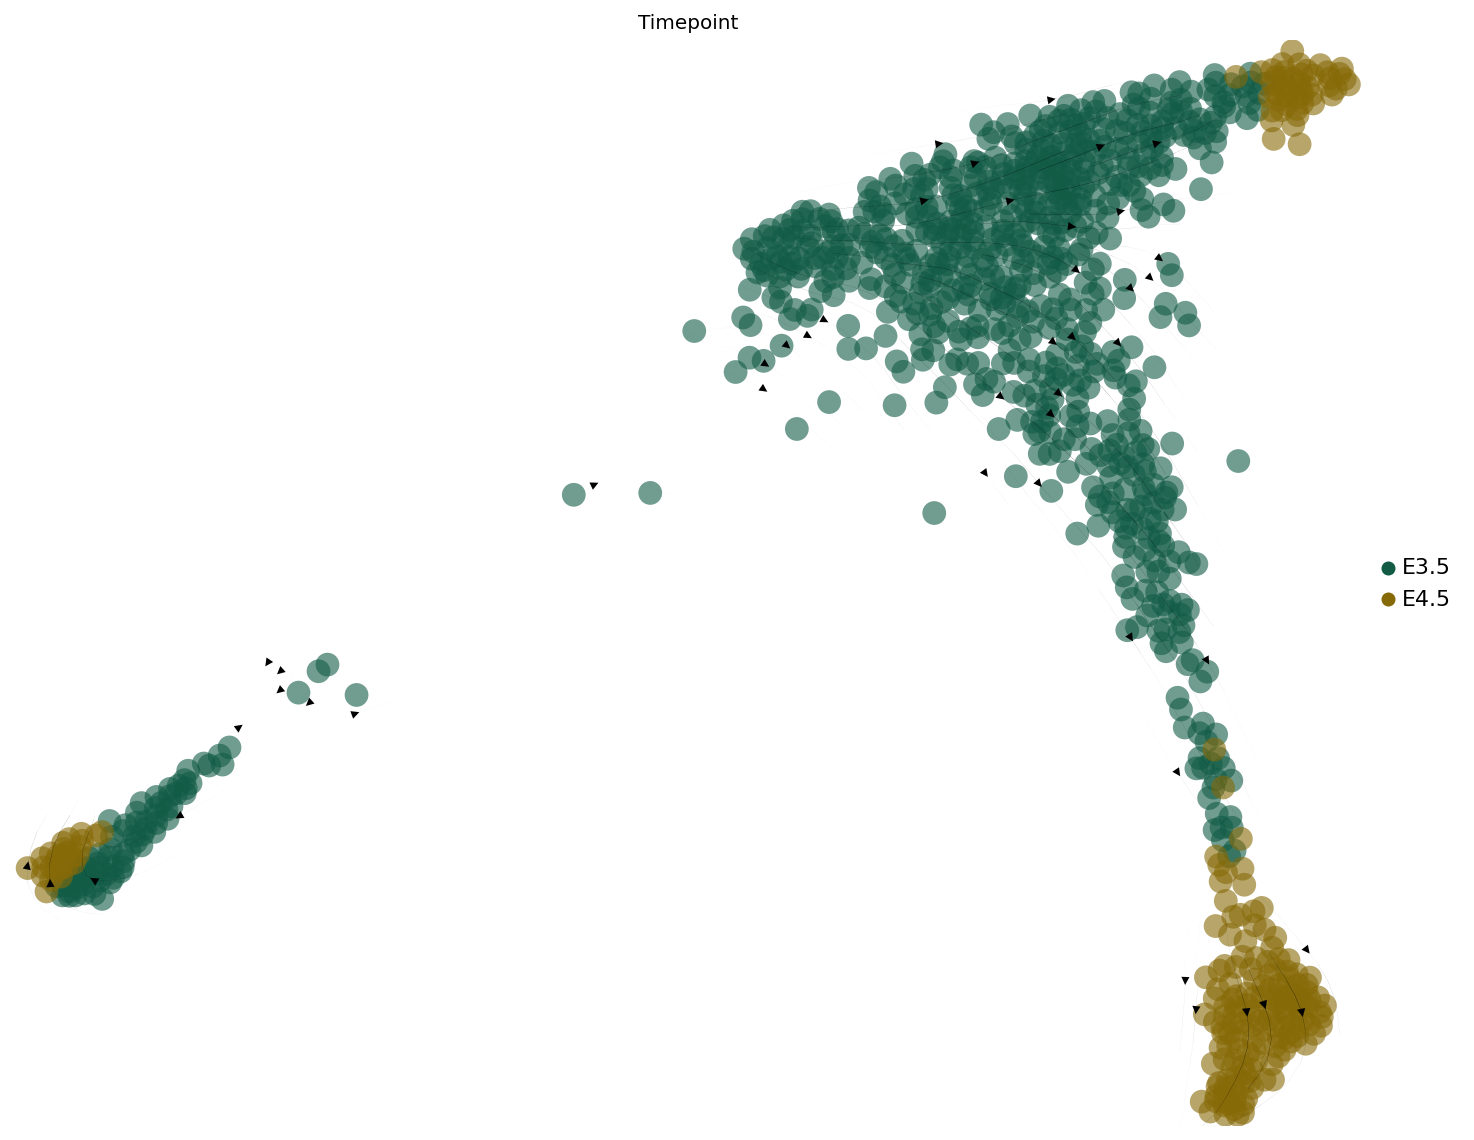

In [27]:
#scv.pl.velocity_embedding_stream(adata_velocity, basis='tsne', color='CellType', legend_loc ='right margin')
scv.pl.velocity_embedding_stream(adata_velocity, basis='tsne', color='Timepoint', legend_loc ='right margin', alpha = 0.6, density = 2,save = 'dev_time.svg', figsize=[15,12], linewidth = 0.08)
#scv.pl.velocity_embedding_stream(adata_velocity, basis='tsne', color='Cluster', legend_loc ='right margin')
#scv.pl.velocity_embedding_stream(adata_velocity, basis='tsne', color='Time_CellType', legend_loc ='right margin')
#scv.pl.velocity_embedding_stream(adata_velocity, basis='tsne', color='Cluster_CellType', legend_loc ='right margin')

In [23]:
#adata_velocity

## Other

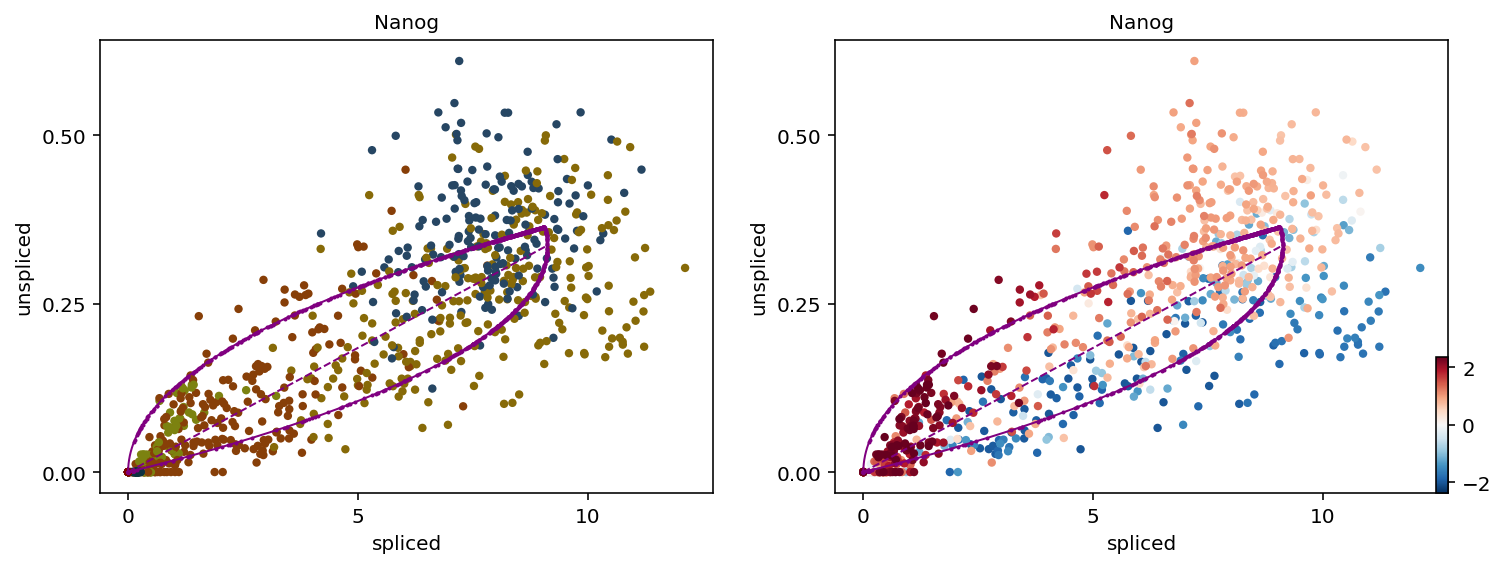

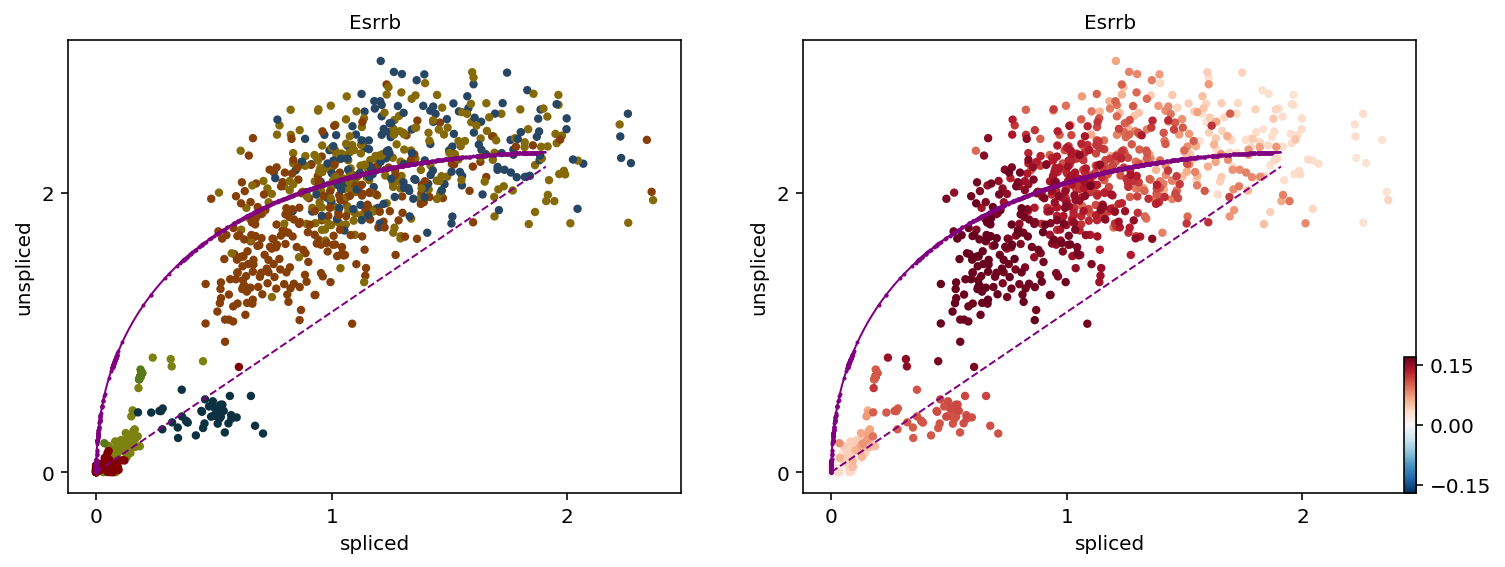

In [24]:
scv.pl.scatter(adata_velocity, 'Nanog', color=['Time_CellType', 'velocity'])
scv.pl.scatter(adata_velocity, 'Esrrb', color=['Time_CellType', 'velocity'])

#scv.pl.scatter(adata_velocity, 'Pou5f1', color=['Time_CellType', 'velocity'])

#scv.pl.scatter(adata_velocity, 'Gata6', color=['Time_CellType', 'velocity'])
#scv.pl.scatter(adata_velocity, 'Pdgfra', color=['Time_CellType', 'velocity'])
#scv.pl.scatter(adata_velocity, 'Gata4', color=['Time_CellType', 'velocity'])

#scv.pl.scatter(adata_velocity, 'Cdx2', color=['Time_CellType', 'velocity'])
#scv.pl.scatter(adata_velocity, 'Tfap2c', color=['Time_CellType', 'velocity'])

#scv.pl.scatter(adata_velocity, 'Pou3f1', color=['Time_CellType', 'velocity'])
#scv.pl.scatter(adata_velocity, 'Otx2', color=['Time_CellType', 'velocity'])
#scv.pl.scatter(adata_velocity, 'Fgf5', color=['Time_CellType', 'velocity'])

--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
saving figure to file ./figures/scvelo_confidence.svg


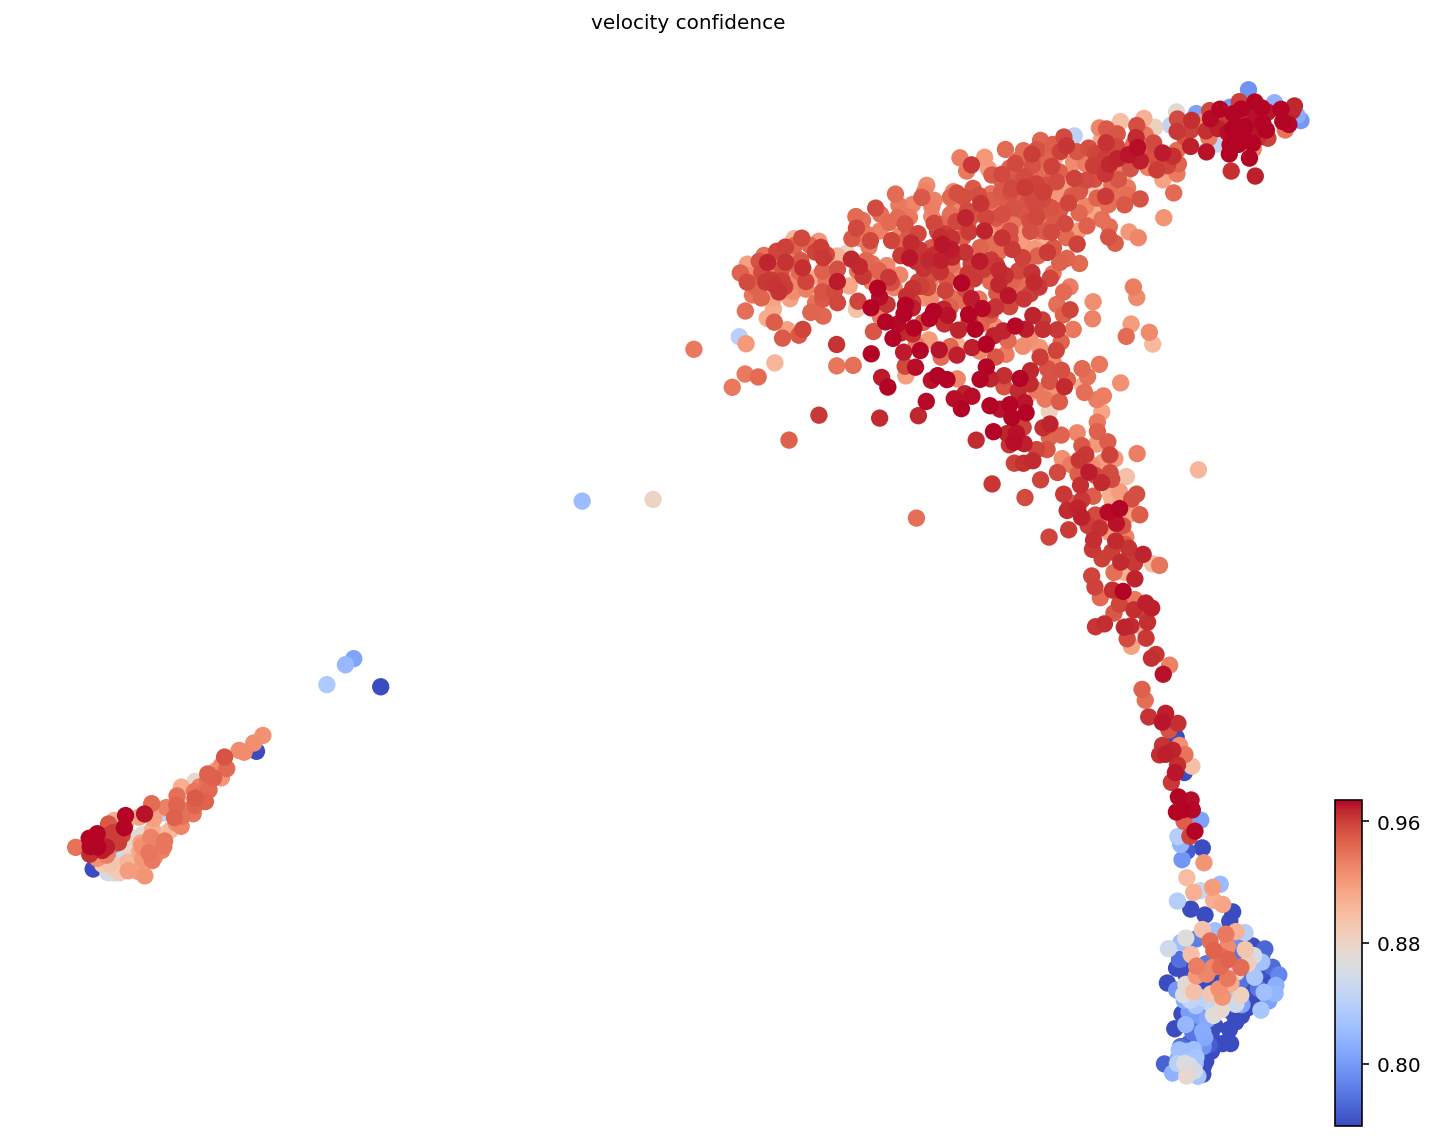

In [38]:
scv.tl.velocity_confidence(adata_velocity)
scv.pl.scatter(adata_velocity, c=['velocity_confidence'], cmap='coolwarm', perc=[5, 95], alpha = 1, save = 'confidence.svg', figsize=[15,12], size = 300)
#scv.pl.scatter(adata_velocity, c=['velocity_length', 'velocity_confidence'], cmap='coolwarm', perc=[5, 95])

## Estimated time

computing terminal states
    identified 1 region of root cells and 2 regions of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)
saving figure to file ./figures/scvelo_latent_time.svg


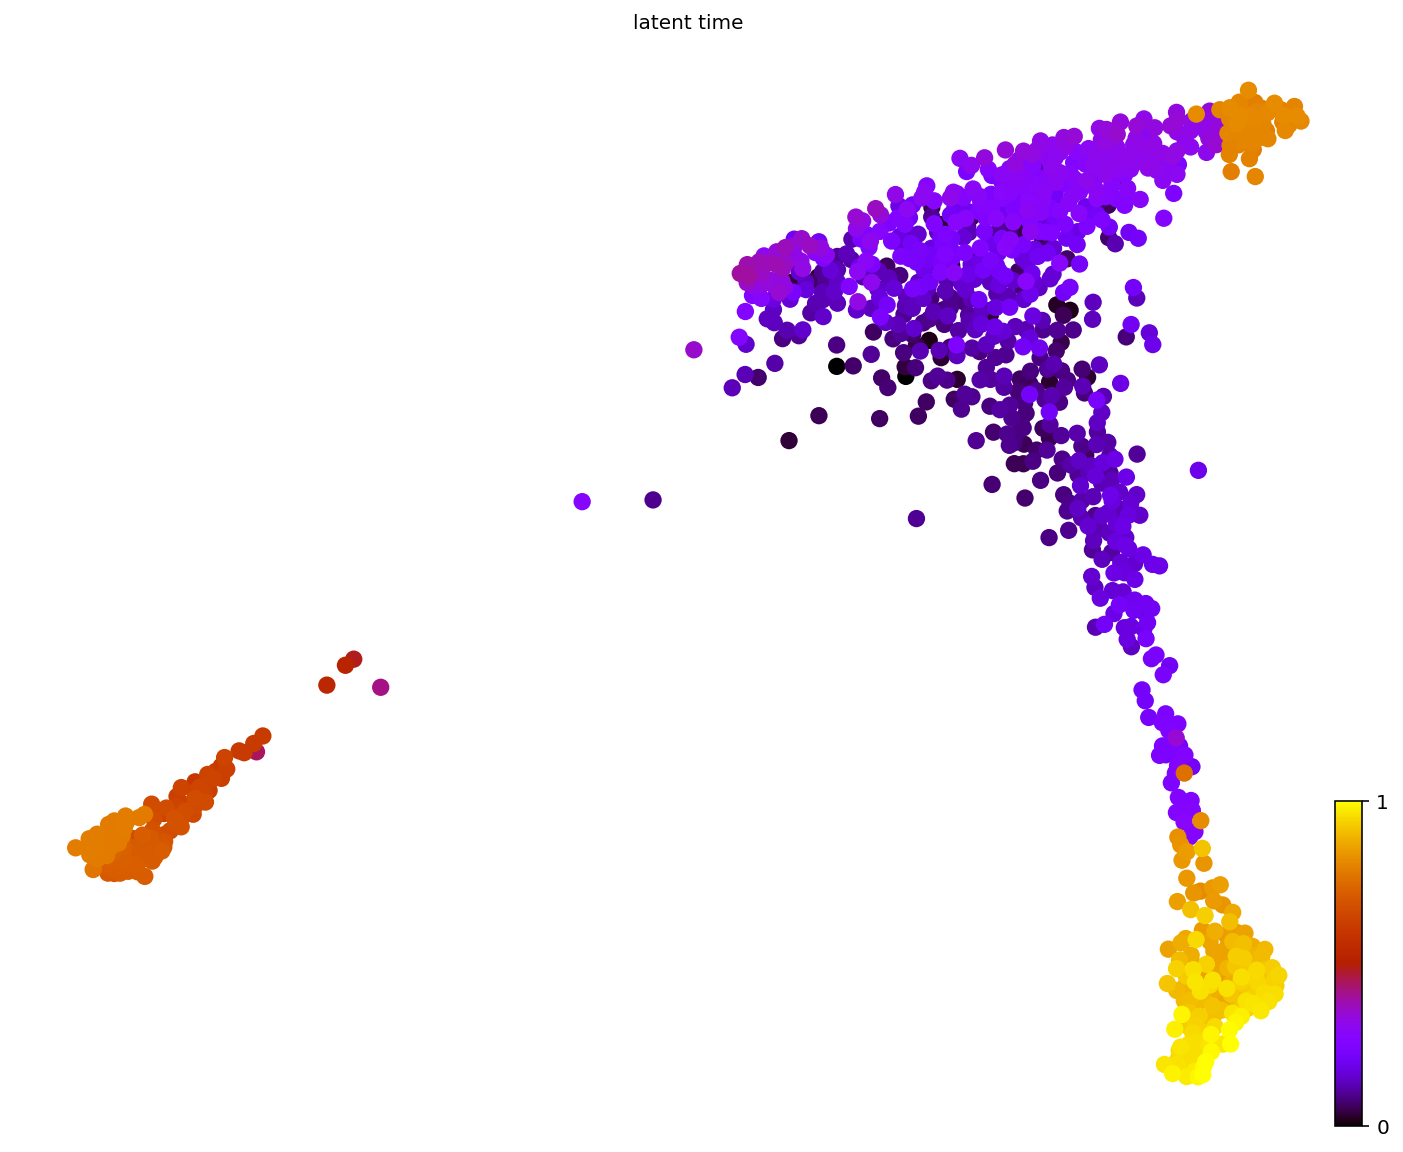

saving figure to file ./figures/scvelo_pseudo_time.svg


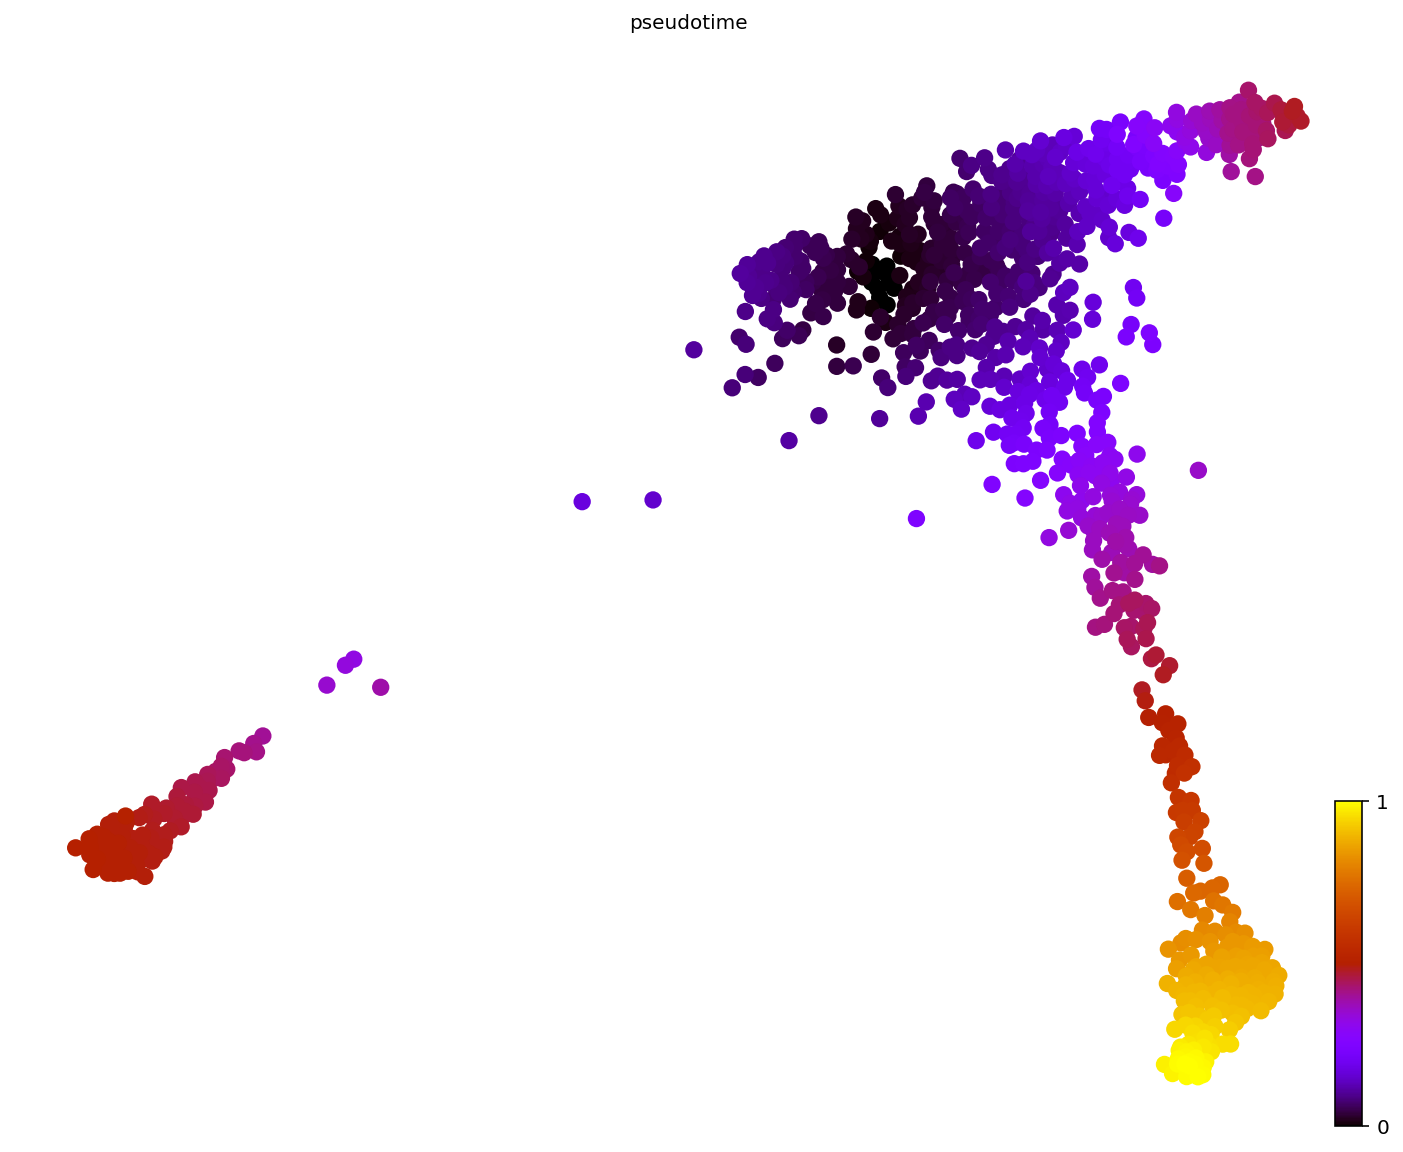

In [39]:
scv.tl.latent_time(adata_velocity)
scv.pl.scatter(adata_velocity, color='latent_time', color_map='gnuplot', size=300, alpha = 1, save = 'latent_time.svg', figsize=[15,12])
scv.pl.scatter(adata_velocity, color='pseudotime', color_map='gnuplot', size=300, alpha = 1, save = 'pseudo_time.svg', figsize=[15,12])

In [26]:
# Subset here to run velocity globally and just visualise individual lineages
#PrE
#adata_velocity = adata_velocity[adata_velocity.obs.Cluster.isin(["E3.5:0", "E3.5:4", "E4.5:0", "E4.5:1"])].copy()
#adata_velocity = adata_velocity[adata_velocity.obs.Cluster.isin(["E3.5:1","E3.5:0", "E3.5:4", "E4.5:0", "E4.5:1"])].copy()

#Epi
#adata_velocity = adata_velocity[adata_velocity.obs.Cluster.isin(["E3.5:1", "E3.5:2", "E4.5:2"])].copy()
#adata_velocity = adata_velocity[adata_velocity.obs.Cluster.isin(["E3.5:2", "E4.5:2"])].copy()

#TE
#adata_velocity = adata_velocity[adata_velocity.obs.Cluster.isin(["E3.5:1", "E3.5:3", "E4.5:3", "nan"])].copy()
adata_velocity = adata_velocity[adata_velocity.obs.Cluster.isin(["E3.5:3", "E4.5:3", "nan"])].copy()

<AxesSubplot:xlabel='latent_time', ylabel='Esrrb'>

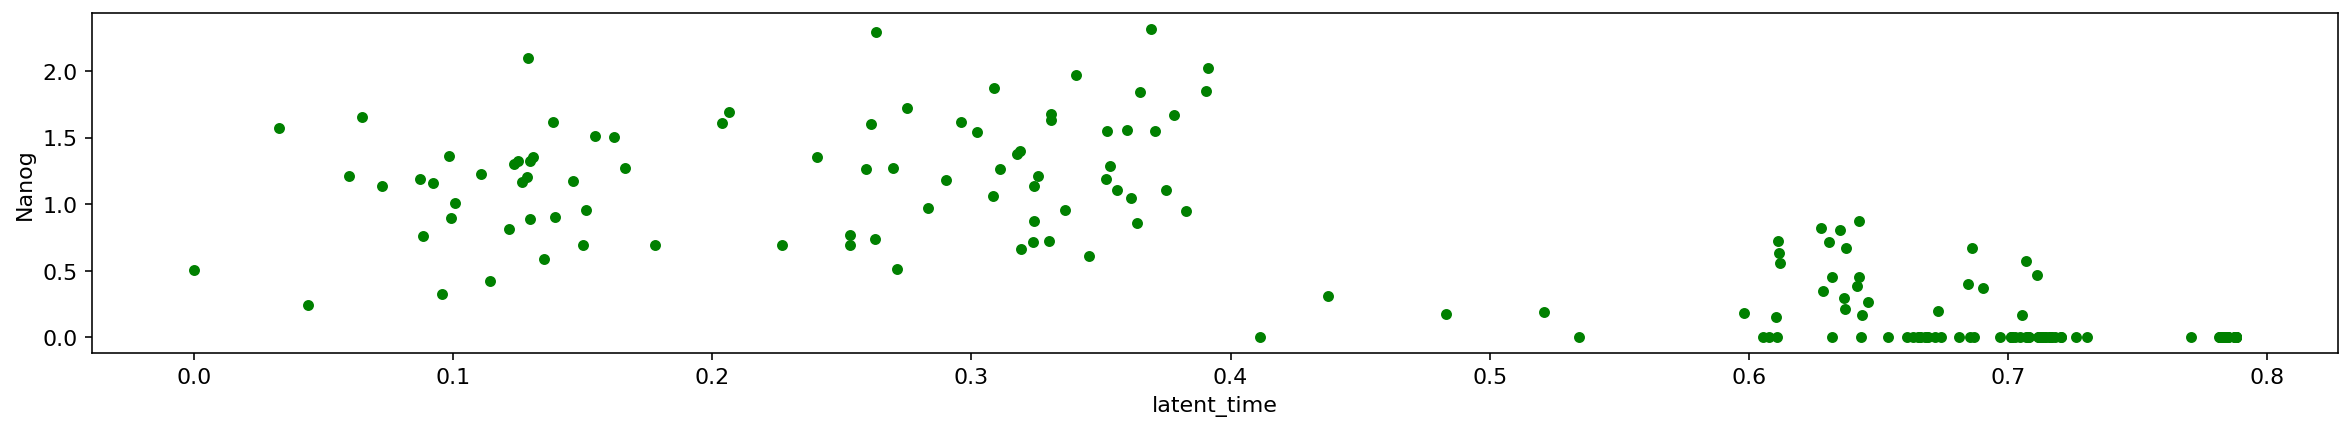

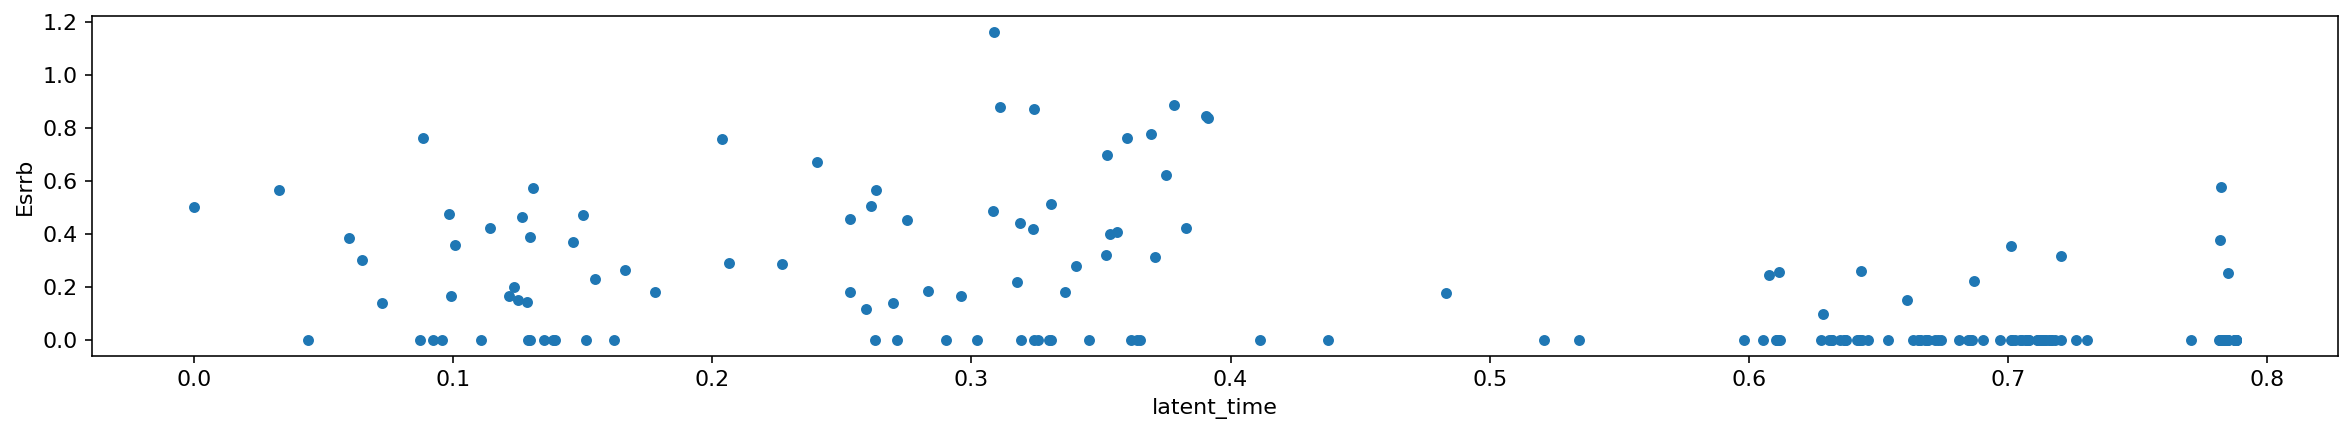

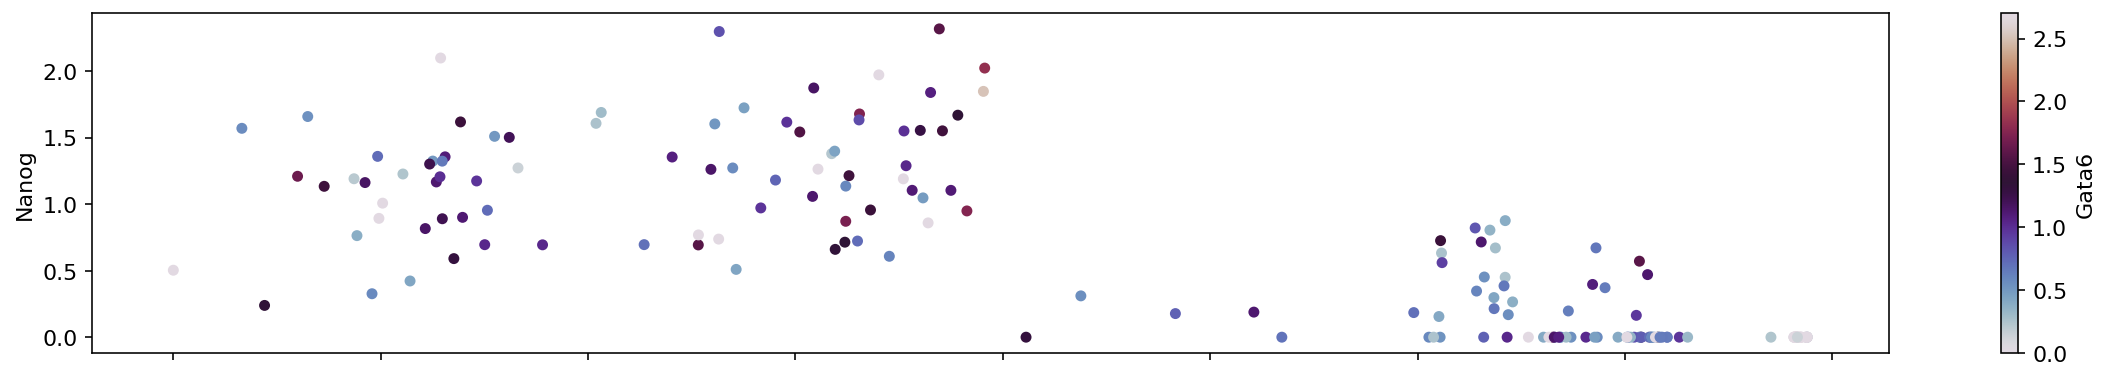

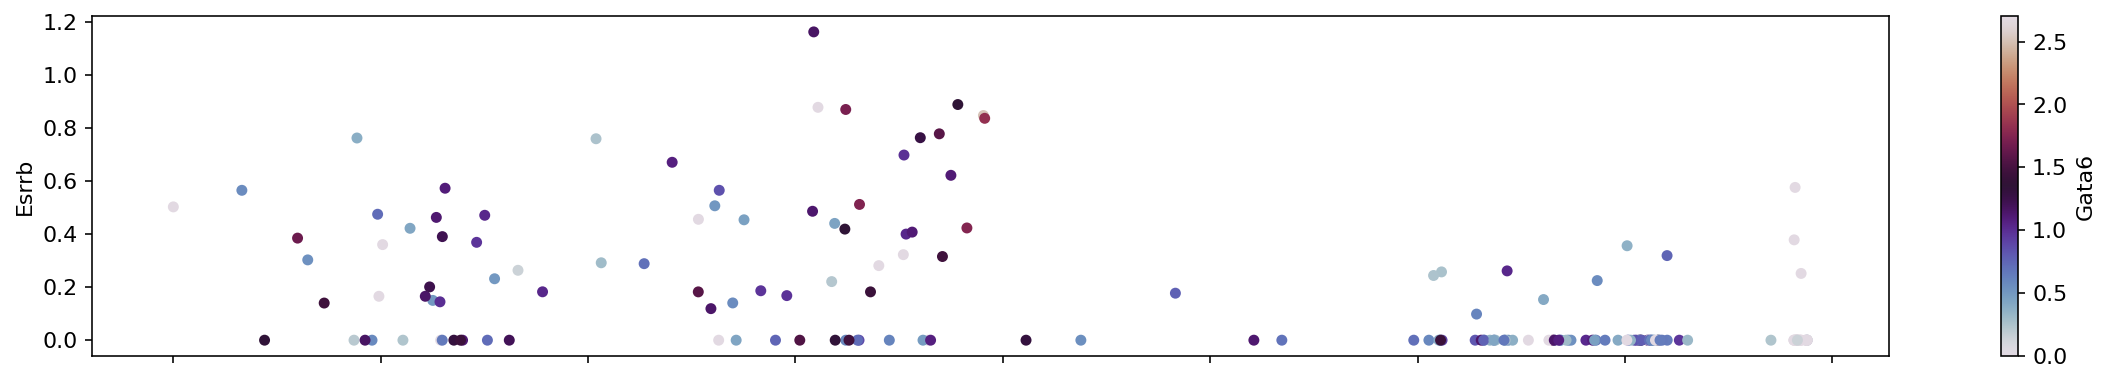

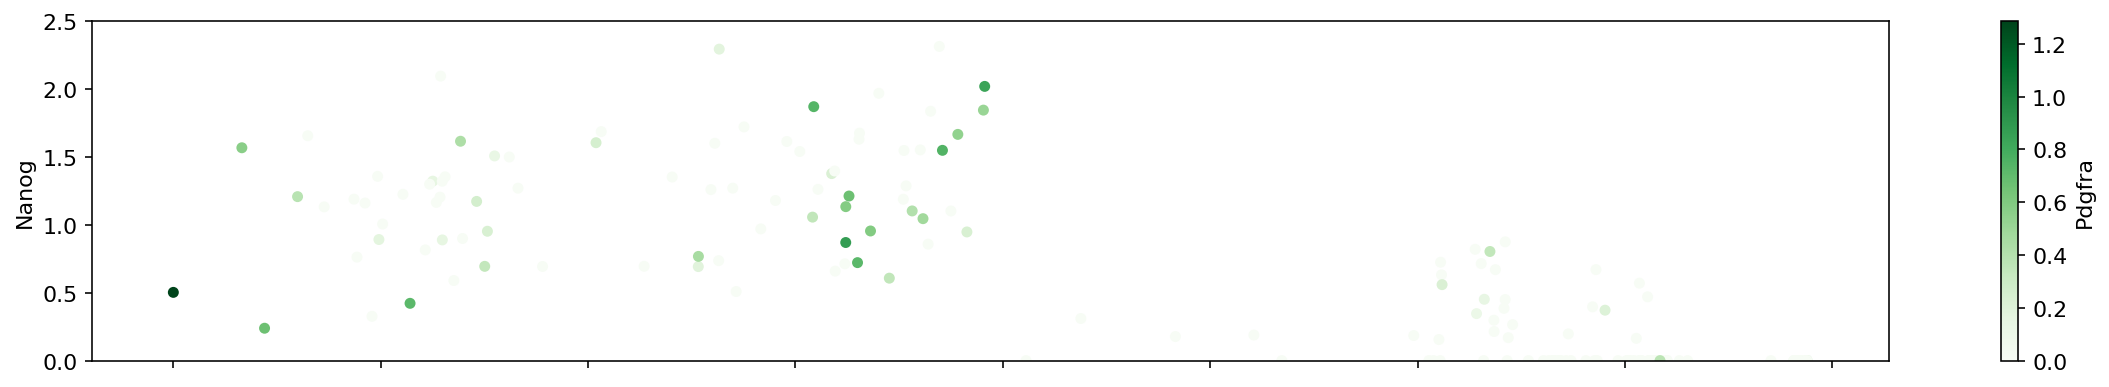

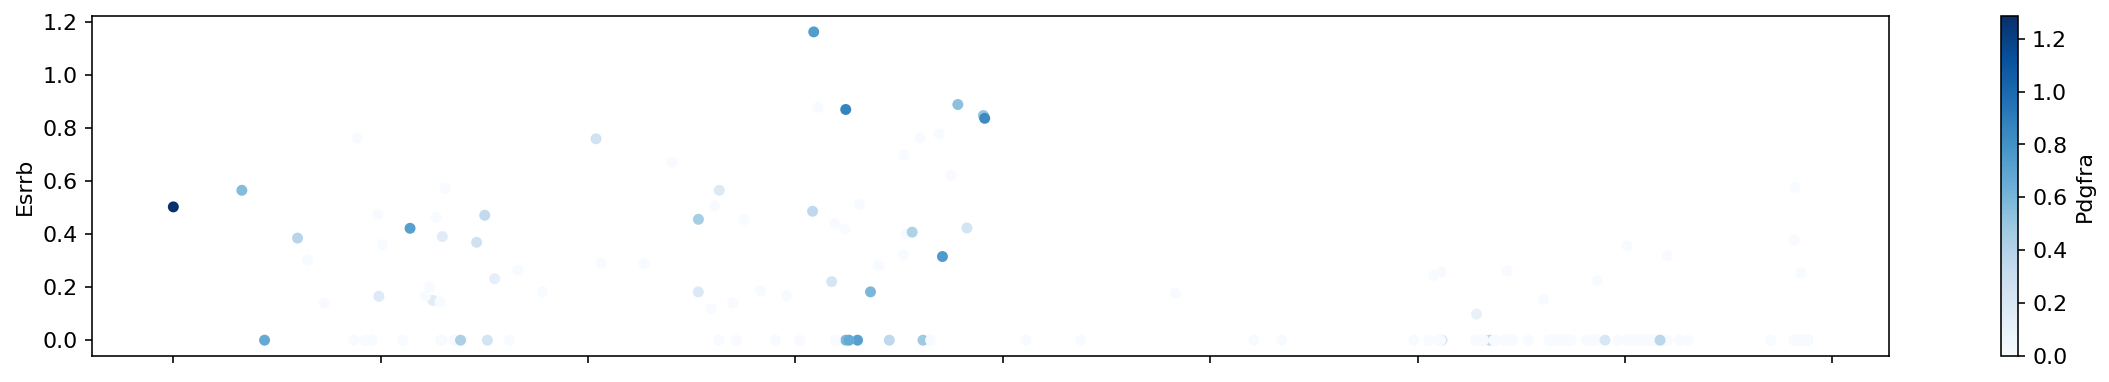

In [27]:
#genes = ["Nanog", "Esrrb", "Gata6", "Gata4", "Pdgfra"]
#genes = ["Nanog", "Esrrb", "Gata6", "Gata4", "Pdgfra","Otx2","Fgf5"]
genes = ["Nanog", "Esrrb", "Gata6", "Pdgfra","Cdx2","Tfap2c"]

#Maddie:
#genes = ["Nanog", "Esrrb", "Pou5f1","Gata6", "Gata4", "Pdgfra"]

df = adata_velocity[:, genes].to_df()
df['latent_time'] = adata_velocity.obs.latent_time.to_numpy()
df['pseudotime'] = adata_velocity.obs.pseudotime.to_numpy()
df['Cluster'] = adata_velocity.obs.Cluster.to_numpy()

df.plot.scatter(x='latent_time', y='Nanog', figsize = (20,3), c = "green")
df.plot.scatter(x='latent_time', y='Esrrb', figsize = (20,3))

#df.plot.scatter(x='latent_time', y='Nanog', figsize = (20,3), c = "Gata4", colormap = "gist_earth_r")
#df.plot.scatter(x='latent_time', y='Esrrb', figsize = (20,3), c = "Gata4", colormap = "twilight")

df.plot.scatter(x='latent_time', y='Nanog', figsize = (20,3), c = "Gata6", colormap = "twilight")
df.plot.scatter(x='latent_time', y='Esrrb', figsize = (20,3), c = "Gata6", colormap = "twilight")

df.plot.scatter(x='latent_time', y='Nanog', figsize = (20,3), c = "Pdgfra", colormap = "Greens", ylim = (0,2.5))
df.plot.scatter(x='latent_time', y='Esrrb', figsize = (20,3), c = "Pdgfra", colormap = "Blues")

#df.plot.scatter(x='latent_time', y='Nanog', figsize = (20,3), c = "Pdgfra", colormap = "Greens", vmax = 1)
#df.plot.scatter(x='latent_time', y='Esrrb', figsize = (20,3), c = "Pdgfra", colormap = "Blues", vmax = 1)

<AxesSubplot:xlabel='latent_time', ylabel='Esrrb'>

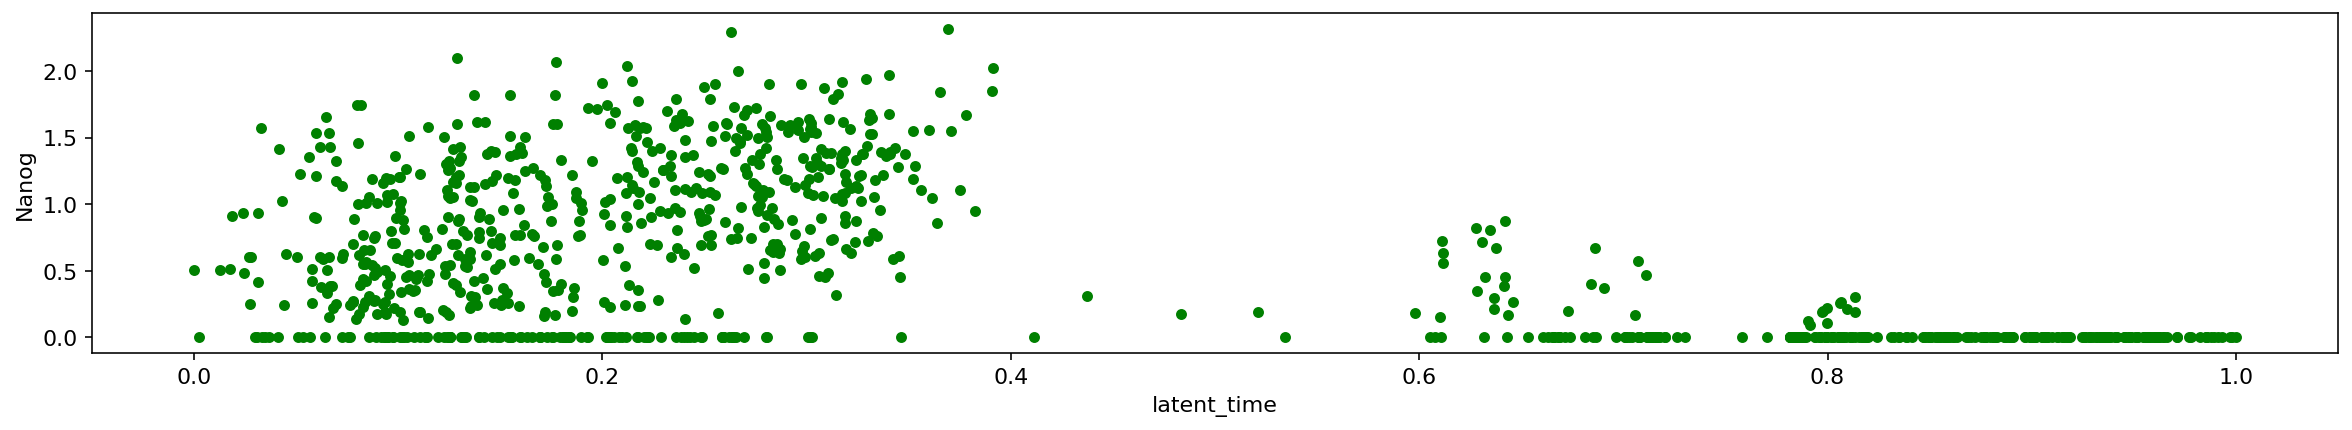

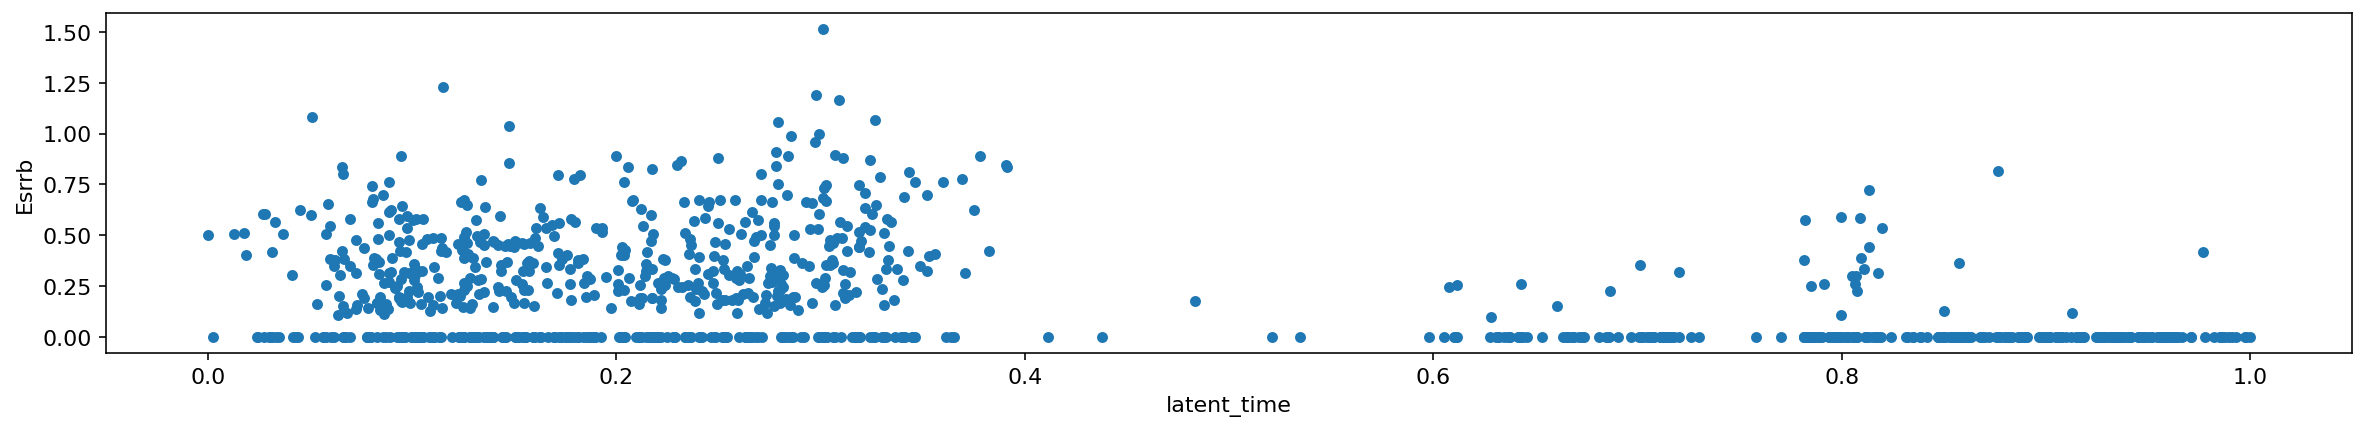

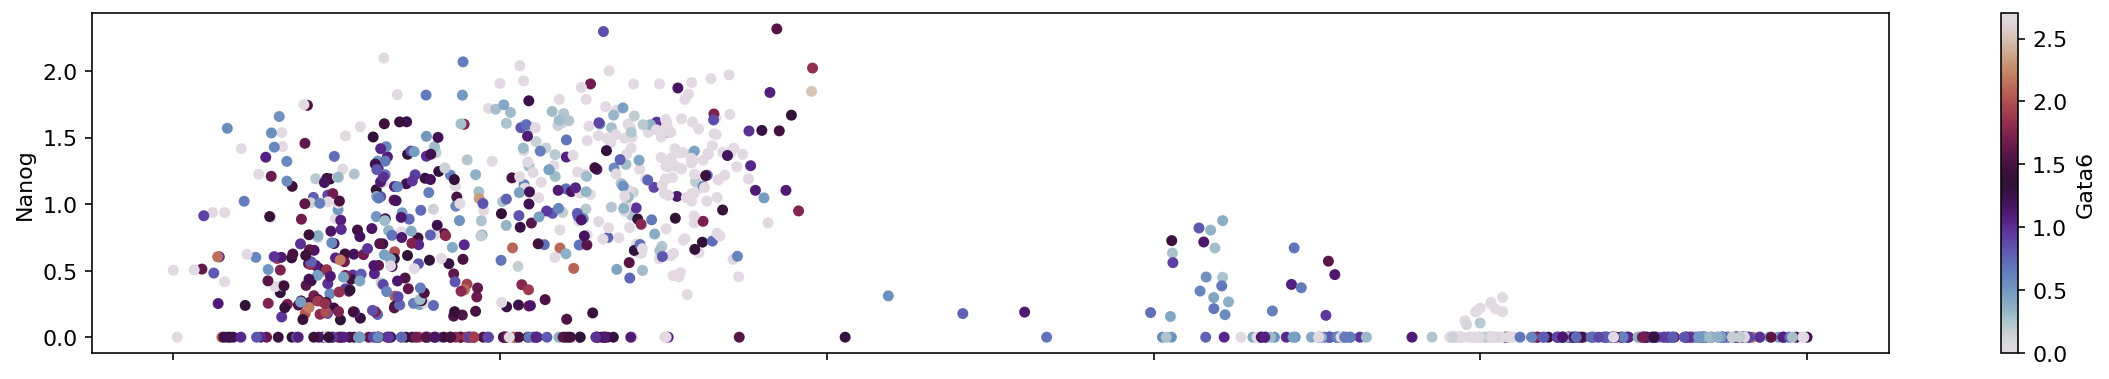

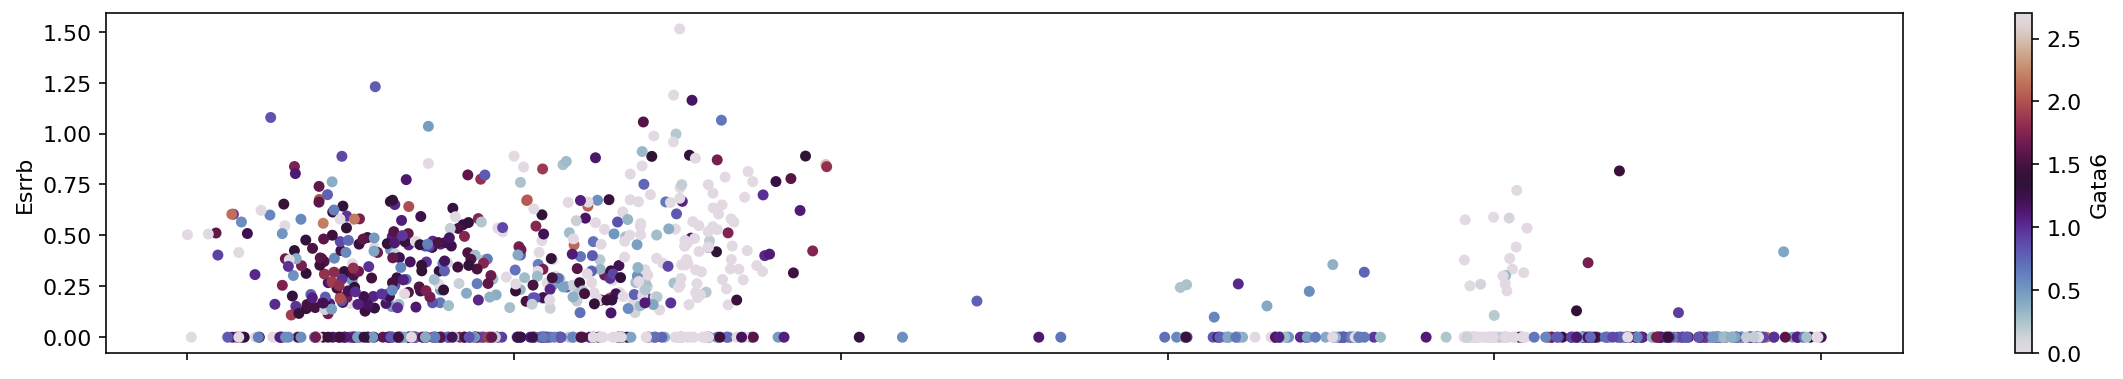

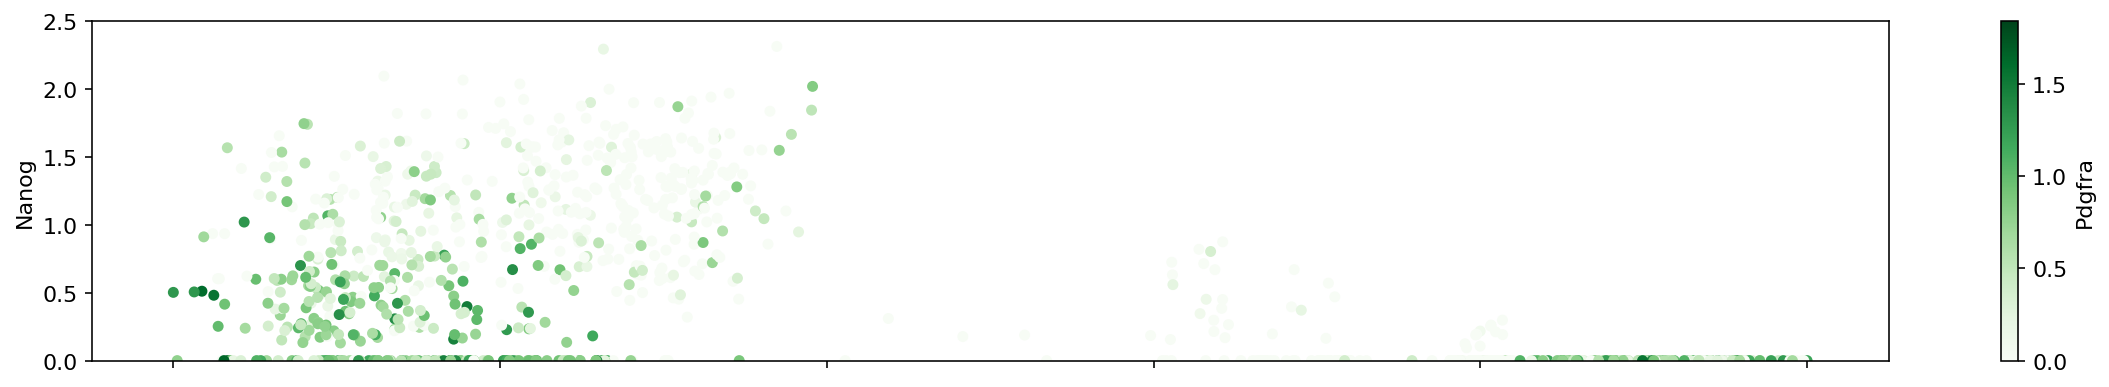

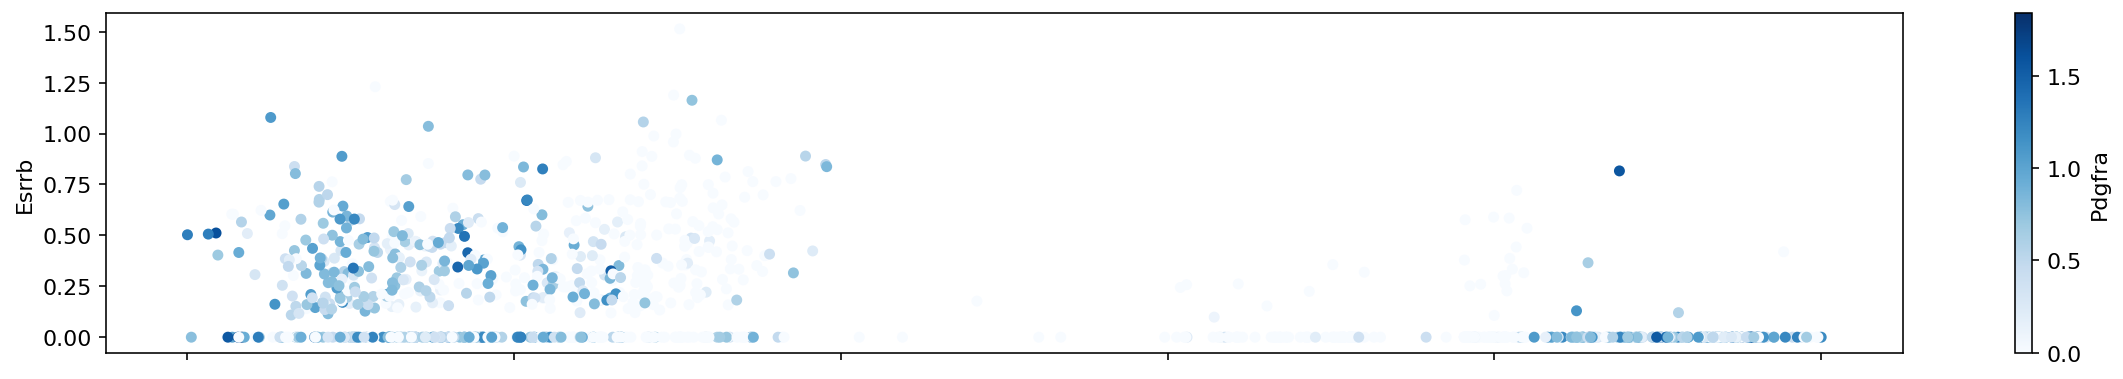

In [22]:
#For TE:
genes = ["Nanog", "Esrrb", "Gata6", "Pdgfra"]

df = adata_velocity[:, genes].to_df()
df['latent_time'] = adata_velocity.obs.latent_time.to_numpy()
df['pseudotime'] = adata_velocity.obs.pseudotime.to_numpy()
df['Cluster'] = adata_velocity.obs.Cluster.to_numpy()

df.plot.scatter(x='latent_time', y='Nanog', figsize = (20,3), c = "green")
df.plot.scatter(x='latent_time', y='Esrrb', figsize = (20,3))

df.plot.scatter(x='latent_time', y='Nanog', figsize = (20,3), c = "Gata6", colormap = "twilight")
df.plot.scatter(x='latent_time', y='Esrrb', figsize = (20,3), c = "Gata6", colormap = "twilight")

df.plot.scatter(x='latent_time', y='Nanog', figsize = (20,3), c = "Pdgfra", colormap = "Greens", ylim = (0,2.5))
df.plot.scatter(x='latent_time', y='Esrrb', figsize = (20,3), c = "Pdgfra", colormap = "Blues")

#df.plot.scatter(x='latent_time', y='Nanog', figsize = (20,3), c = "Pdgfra", colormap = "Greens", vmax = 1)
#df.plot.scatter(x='latent_time', y='Esrrb', figsize = (20,3), c = "Pdgfra", colormap = "Blues", vmax = 1)

In [28]:
df

index                  Nanog     Esrrb     Gata6    Pdgfra      Cdx2  \
TTTGTCAGTCAAACTC-0  0.713620  0.419160  1.351642  0.000000  0.419160   
TTAGTTCTCGCTGATA-0  0.214434  0.000000  0.671229  0.000000  2.040763   
TTGGAACTCTCTGAGA-0  1.133302  0.140128  1.460768  0.000000  0.789988   
TAGAGCTCAAACTGTC-0  0.892535  0.165653  0.000000  0.165653  0.000000   
TACTTACAGGTGCAAC-0  0.164152  0.000000  0.957639  0.000000  2.519079   
...                      ...       ...       ...       ...       ...   
CTTAACTCAGACGCCT-1  0.000000  0.000000  0.000000  0.144257  0.144257   
CACAGGCAGTCCGTAT-1  0.000000  0.000000  0.000000  0.000000  1.273012   
CACCTTGGTTTACTCT-1  0.000000  0.000000  0.000000  0.000000  0.000000   
CGGAGCTTCTGCCAGG-1  0.000000  0.000000  0.000000  0.000000  0.000000   
CCAATCCTCGGAGCAA-1  0.000000  0.000000  0.141200  0.000000  1.186266   

index                 Tfap2c  latent_time  pseudotime Cluster  
TTTGTCAGTCAAACTC-0  0.940809     0.323833    0.066919  E3.5:3  
TTAGTTCTCGCTGATA-0  0.214434     0.636922    0.441817     nan  
TTGGAACTCTCTGAGA-0  0.560818     0.072746    0.065482  E3.5:3  
TAGAGCTCAAACTGTC-0  0.307726     0.099138    0.056498  E3.5:3  
TACTTACAGGTGCAAC-0  0.305119     0.705496    0.492523     nan  
...                      ...          ...         ...     ...  
CTTAACTCAGACGCCT-1  1.975084     0.787846    0.500193  E4.5:3  
CACAGGCAGTCCGTAT-1  0.969441     0.781617    0.495547  E4.5:3  
CACCTTGGTTTACTCT-1  1.828911     0.786976    0.501711  E4.5:3  
CGGAGCTTCTGCCAGG-1  1.885424     0.787846    0.500331  E4.5:3  
CCAATCCTCGGAGCAA-1  0.922890     0.783195    0.495723  E4.5:3  

[186 rows x 9 columns]

In [29]:
df_Nanog = df[df["Nanog"] > 0]
#print(np.mean(df_Nanog["Nanog"]))
#print(np.median(df_Nanog["Nanog"]))

df_Esrrb = df[df["Esrrb"] > 0]

#df_Gata6 = df[df["Gata6"] > 0]
#df_Gata4 = df[df["Gata4"] > 0]

#df_Pdgfra = df[df["Pdgfra"] > 0]
#df_Pdgfra = df[df["Fgf5"] > 0]
#df_Pdgfra = df[df["Otx2"] > 0]
df_Pdgfra = df[df["Cdx2"] > 0]
df_Pdgfra = df[df["Tfap2c"] > 0]

df_norm = df.copy()
#print(df["Nanog"])
#print(df["Nanog"].div(np.mean(df_Nanog["Nanog"]))

df_norm["Nanog"] = df_norm["Nanog"].div(np.mean(df_Nanog["Nanog"]))
df_norm["Esrrb"] = df_norm["Esrrb"].div(np.mean(df_Esrrb["Esrrb"]))
#df_norm["Gata6"] = df_norm["Gata6"].div(np.mean(df_Gata6["Gata6"]))
#df_norm["Gata4"] = df_norm["Gata4"].div(np.mean(df_Gata4["Gata4"]))
#df_norm["Pdgfra"] = df_norm["Pdgfra"].div(np.mean(df_Pdgfra["Pdgfra"]))
#df_norm["Fgf5"] = df_norm["Fgf5"].div(np.mean(df_Pdgfra["Fgf5"]))
#df_norm["Otx2"] = df_norm["Otx2"].div(np.mean(df_Pdgfra["Otx2"]))
df_norm["Tfap2c"] = df_norm["Tfap2c"].div(np.mean(df_Pdgfra["Tfap2c"]))
df_norm["Cdx2"] = df_norm["Cdx2"].div(np.mean(df_Pdgfra["Cdx2"]))
#df_norm["Pou5f1"] = df_norm["Pou5f1"].div(np.mean(df_Esrrb["Pou5f1"]))
#print(df_norm)

<AxesSubplot:xlabel='pseudotime', ylabel='Esrrb'>

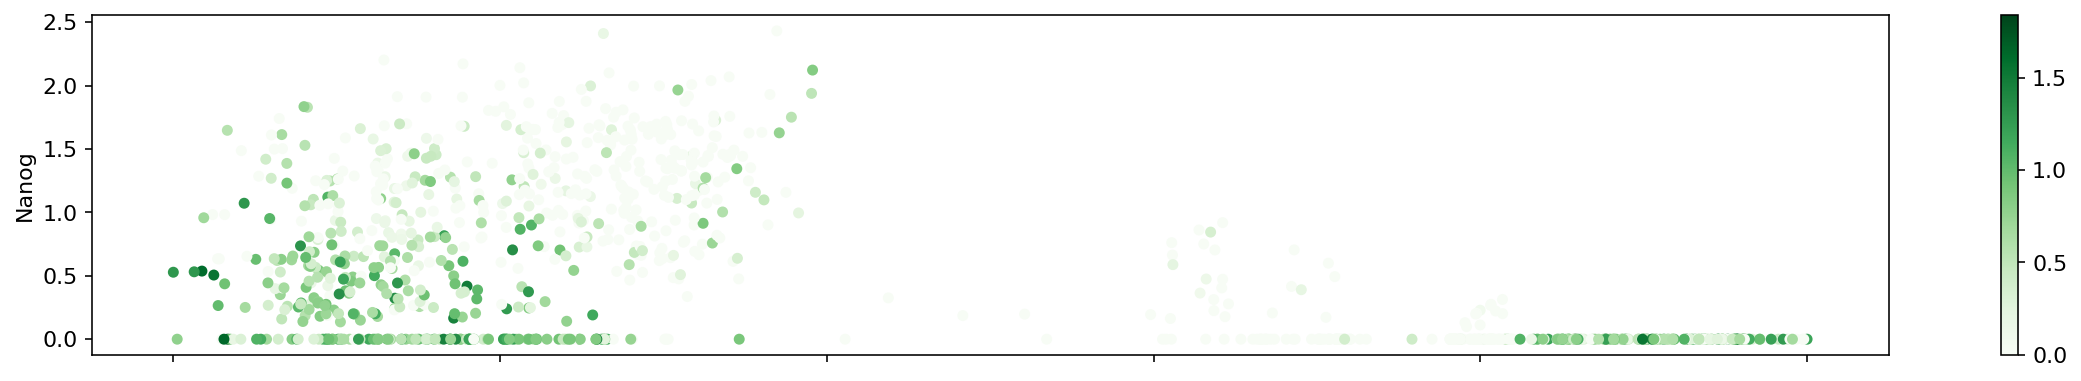

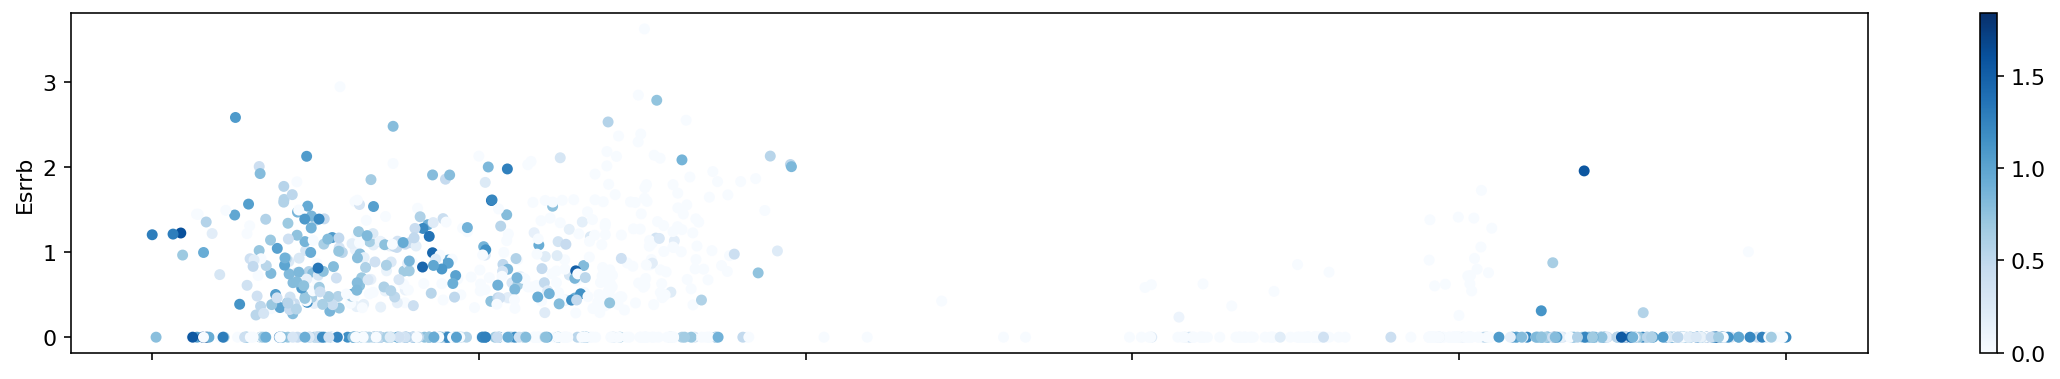

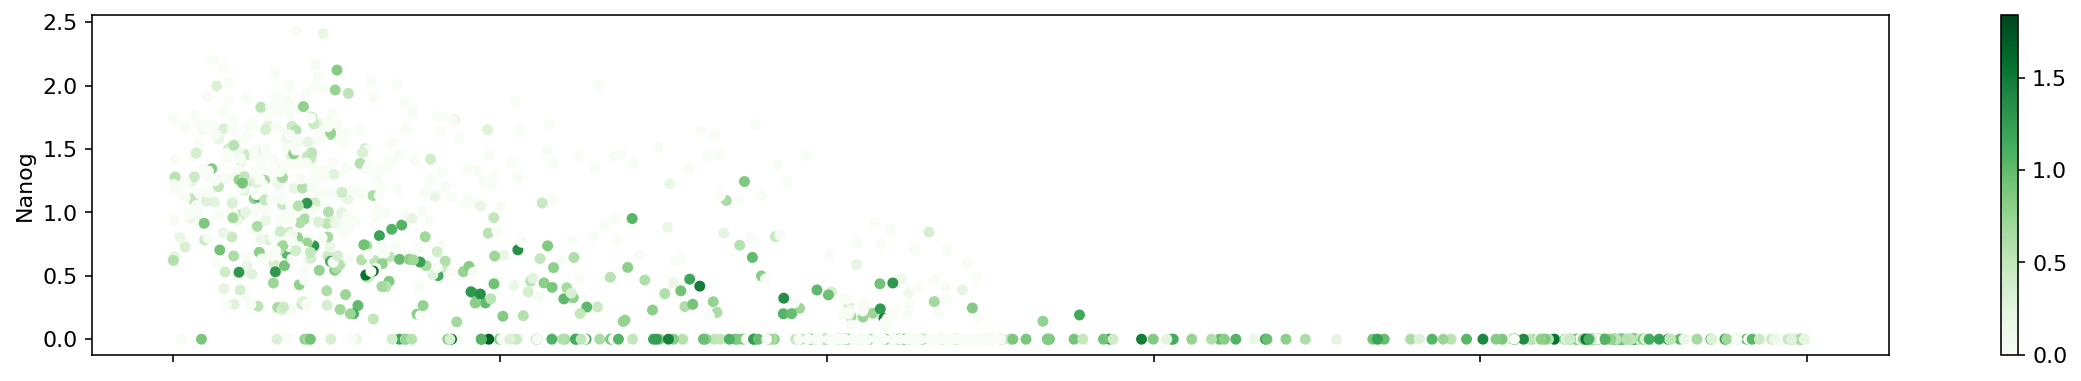

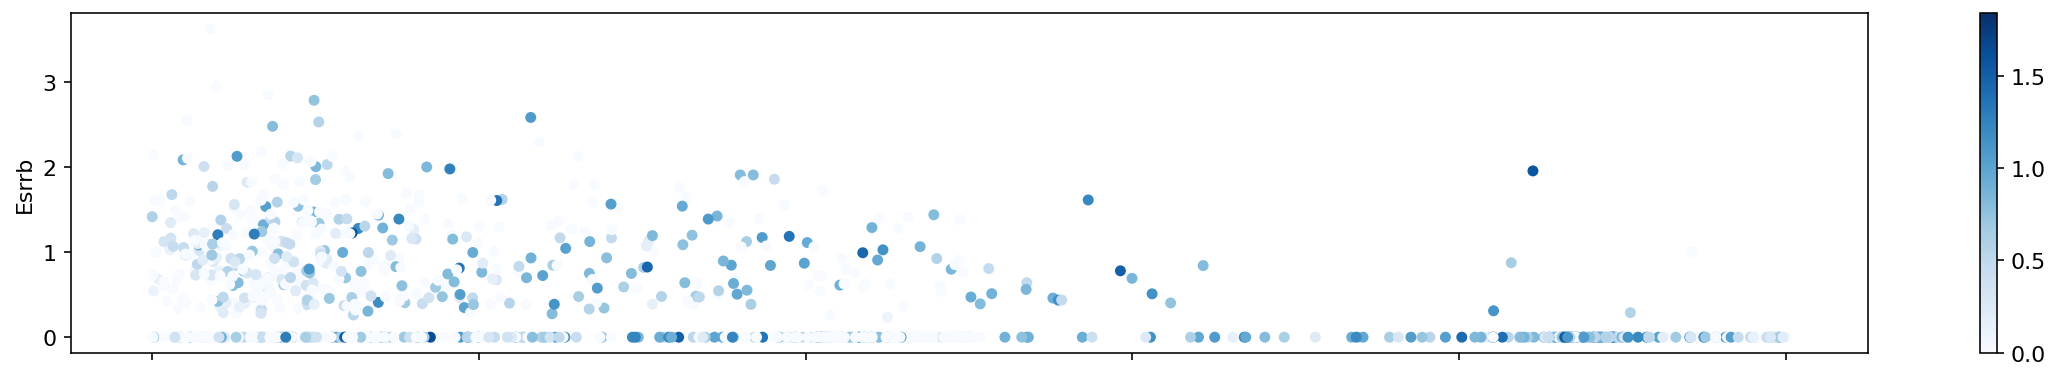

In [27]:
#df = adata_velocity[:, genes].to_df()
#df['pseudotime'] = adata_velocity.obs.pseudotime.to_numpy()


df_norm.plot.scatter(x='latent_time', y='Nanog', figsize = (20,3), color = df["Pdgfra"], colormap = "Greens")
df_norm.plot.scatter(x='latent_time', y='Esrrb', figsize = (20,3), color = df["Pdgfra"], colormap = "Blues")

df_norm.plot.scatter(x='pseudotime', y='Nanog', figsize = (20,3), color = df["Pdgfra"], colormap = "Greens")
df_norm.plot.scatter(x='pseudotime', y='Esrrb', figsize = (20,3), color = df["Pdgfra"], colormap = "Blues")

In [49]:
#df2 = df_norm.sort_values(by = 'pseudotime')[['Nanog','Esrrb','Gata4','Gata6','Pdgfra','Otx2','Fgf5','Cdx2','Tfap2c']]
df2 = df_norm.sort_values(by = 'pseudotime')[['Nanog','Esrrb','Pou5f1','Gata4','Gata6','Pdgfra']]

In [50]:
window_period: int = int(df2.shape[0] * 0.1)
span = np.ones(window_period) / window_period

# convolution
df2_approx = df2.apply(lambda col: np.convolve(col, span, mode='same'), axis=0)

<AxesSubplot:>

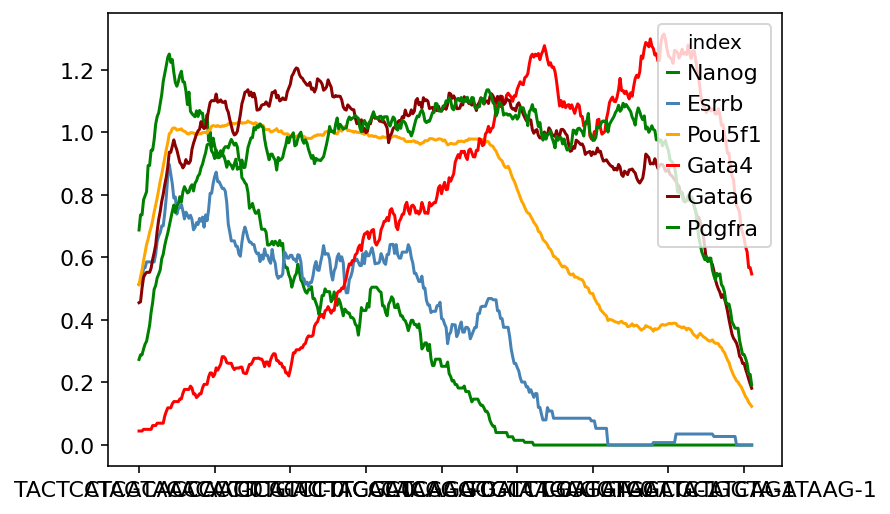

In [51]:
df2_approx.plot.line(color = ['green', 'steelblue','orange','red','darkred'])

In [ ]:
#For TE:
df2 = df_norm.sort_values(by = 'pseudotime')[['Nanog','Esrrb','Gata6','Pdgfra']]
window_period: int = int(df2.shape[0] * 0.1)
span = np.ones(window_period) / window_period

# convolution
df2_approx = df2.apply(lambda col: np.convolve(col, span, mode='same'), axis=0)
df2_approx.plot.line(color = ['green', 'steelblue','red','darkred'])

In [30]:
plt.rcParams["axes.grid"] = False
import seaborn as sns

saving figure to file ./figures/scvelo_heatmap_PrE.svg


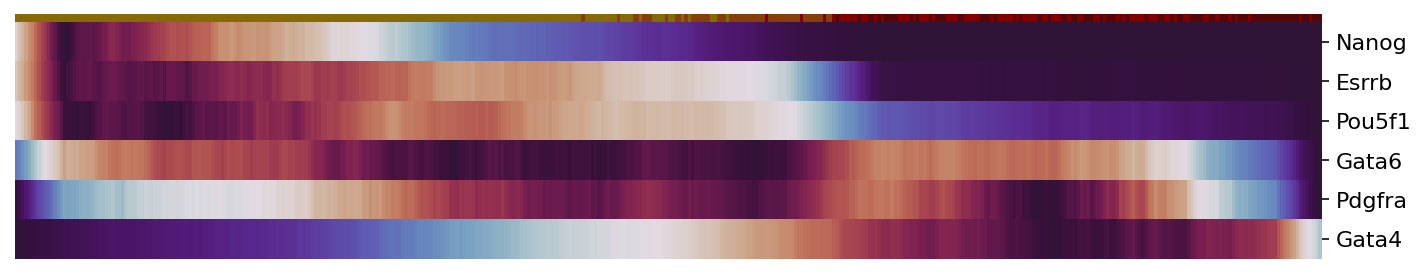

saving figure to file ./figures/scvelo_heatmap_PrE_latent.svg


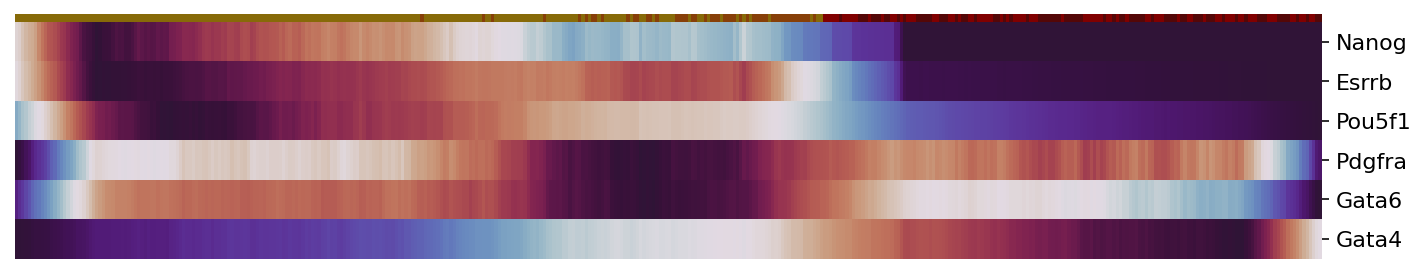

In [53]:
#PrE
#scv.pl.heatmap(adata_velocity, var_names=['Nanog','Esrrb', 'Pou5f1','Gata6','Gata4','Pdgfra'], sortby='pseudotime', col_color='Cluster_CellType', n_convolve=30, figsize=[10, 2], color_map='twilight_shifted', save = 'PrE.svg')
#scv.pl.heatmap(adata_velocity, var_names=['Nanog', 'Esrrb','Pou5f1', 'Gata6','Gata4','Pdgfra'], sortby='latent_time', col_color='Cluster_CellType', n_convolve=50, figsize=[10, 2], color_map='twilight_shifted',save = 'PrE_latent.svg')

saving figure to file ./figures/scvelo_heatmap_PrE.svg


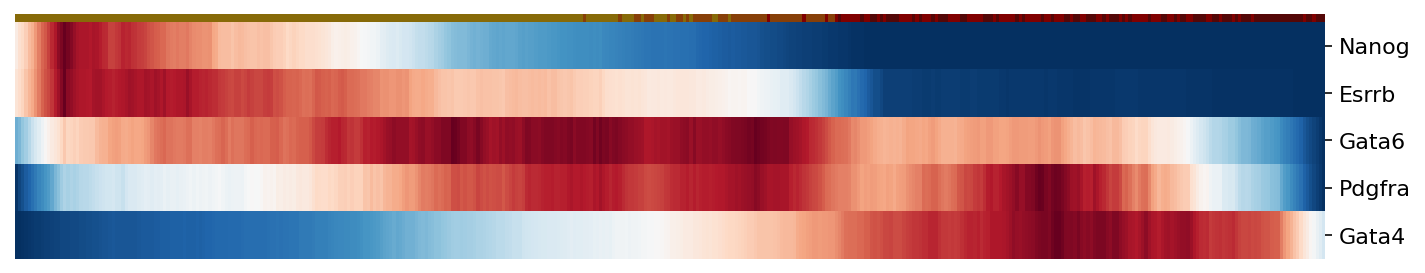

saving figure to file ./figures/scvelo_heatmap_PrE_latent.svg


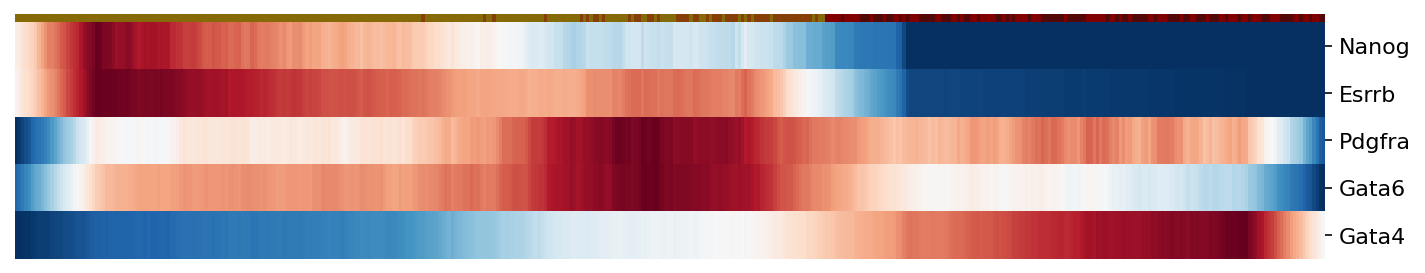

In [74]:
#PrE
scv.pl.heatmap(adata_velocity, var_names=['Nanog','Esrrb', 'Gata6','Gata4','Pdgfra'], sortby='pseudotime', col_color='Cluster_CellType', n_convolve=30, figsize=[10, 2], color_map='RdBu_r', save = 'PrE.svg')
scv.pl.heatmap(adata_velocity, var_names=['Nanog', 'Esrrb', 'Gata6','Gata4','Pdgfra'], sortby='latent_time', col_color='Cluster_CellType', n_convolve=50, figsize=[10, 2], color_map='RdBu_r',save = 'PrE_latent.svg') #coolwarm, RdGy_r, inferno, twilight_shifted, copper, turbo, cubehelix, YlGnBu

saving figure to file ./figures/scvelo_heatmap_Epi.svg


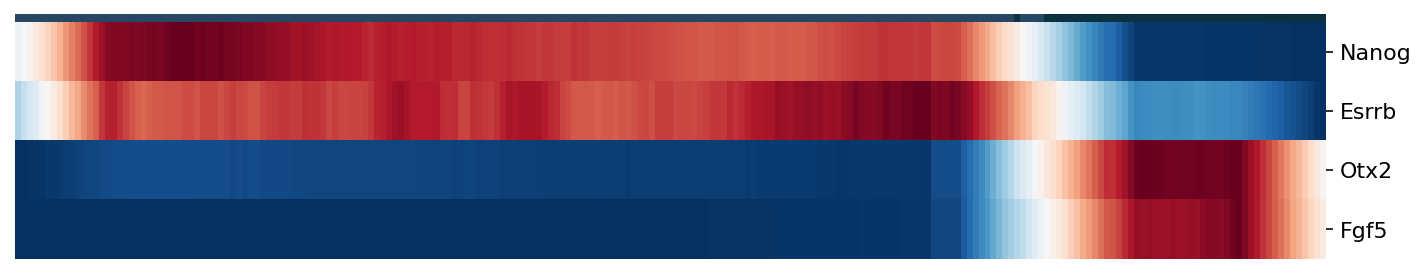

saving figure to file ./figures/scvelo_heatmap_Epi_latent.svg


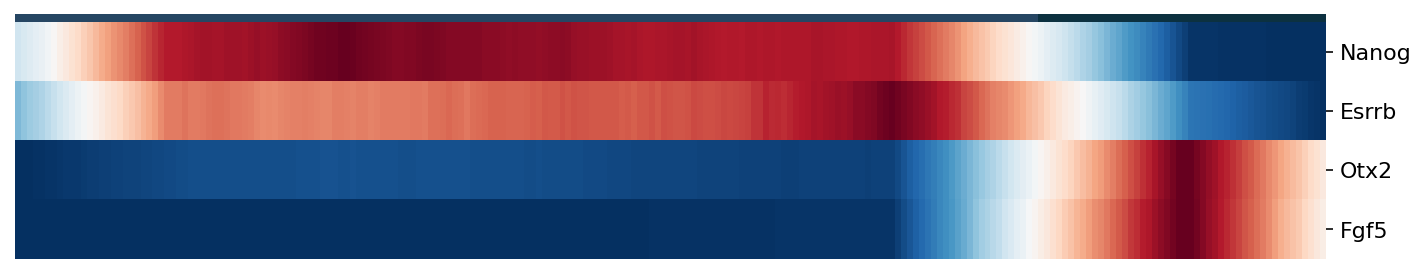

In [32]:
#Epi
scv.pl.heatmap(adata_velocity, var_names=['Nanog','Esrrb', 'Otx2','Fgf5'], sortby='pseudotime', col_color='Cluster_CellType', n_convolve=30, figsize=[10, 2], color_map='RdBu_r', save= 'Epi.svg')
scv.pl.heatmap(adata_velocity, var_names=['Nanog','Esrrb', 'Otx2','Fgf5'], sortby='latent_time', col_color='Cluster_CellType', n_convolve=50, figsize=[10, 2], color_map='RdBu_r', save= 'Epi_latent.svg')

saving figure to file ./figures/scvelo_heatmap_TE.svg


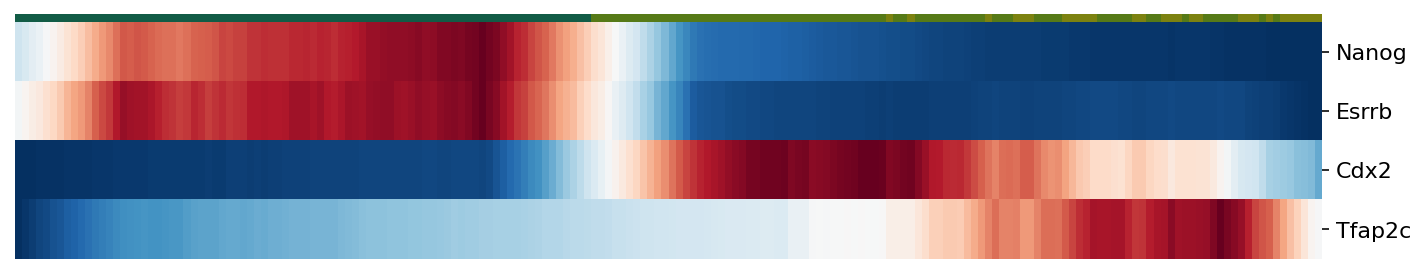

saving figure to file ./figures/scvelo_heatmap_TE_latent.svg


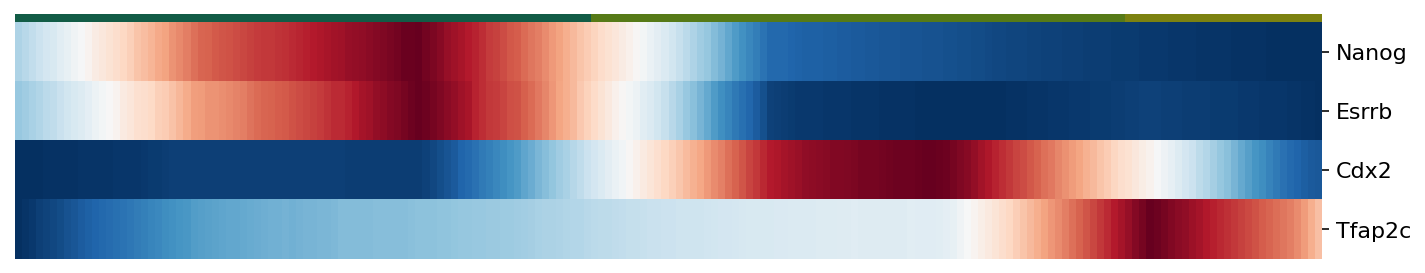

saving figure to file ./figures/scvelo_heatmap_colorbar_twlightshifted.svg


ValueError: 'bboxes' cannot be empty

<Figure size 720x504 with 5 Axes>

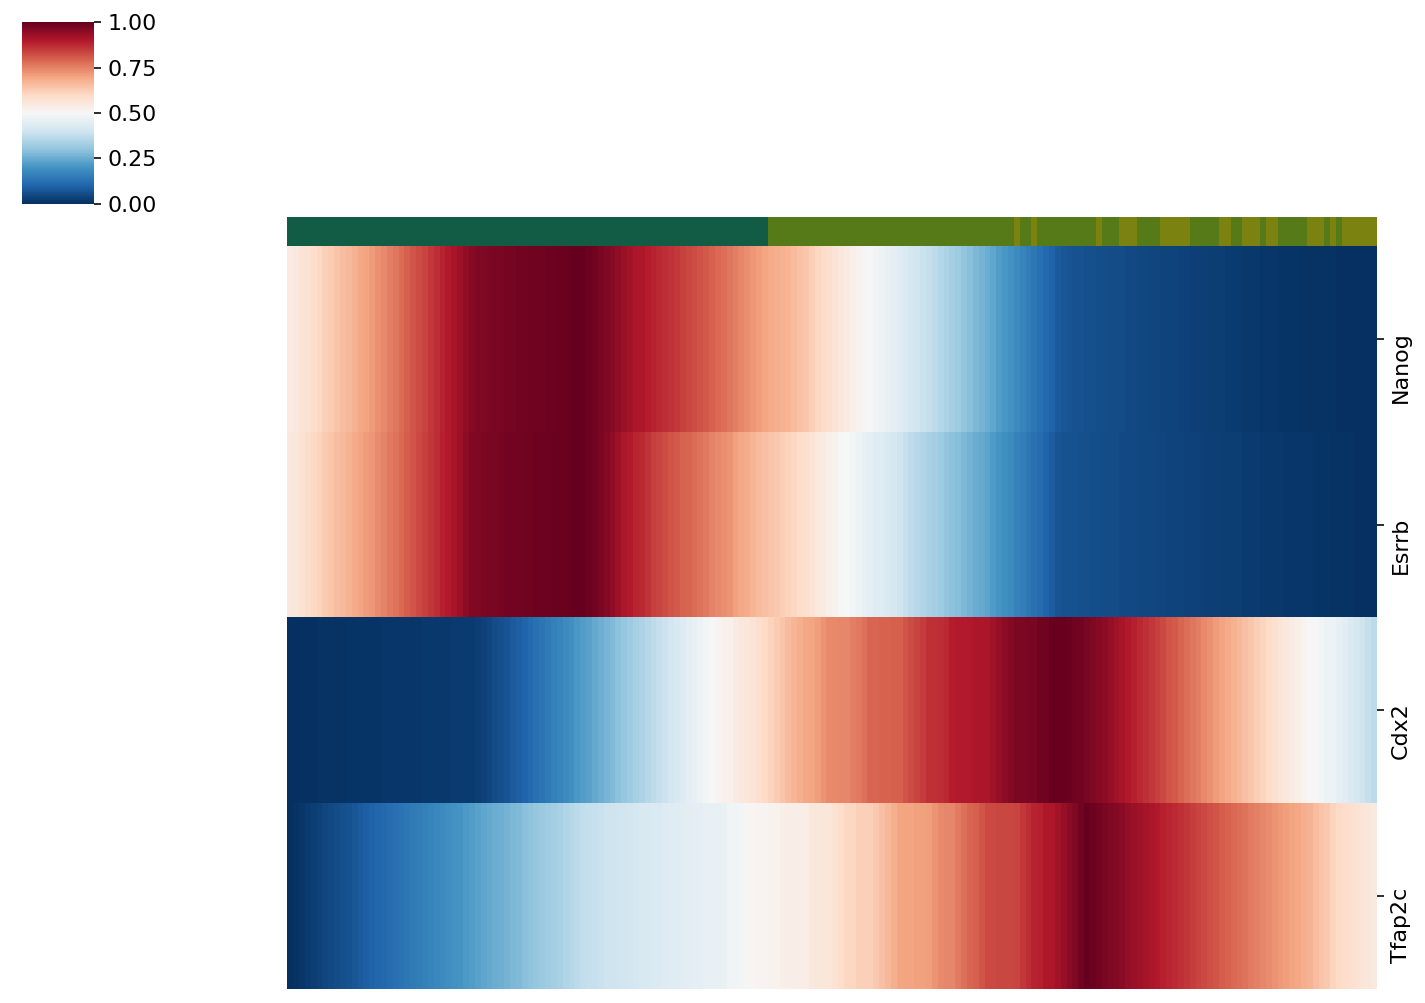

In [31]:
#TE
scv.pl.heatmap(adata_velocity, var_names=['Nanog','Esrrb', 'Cdx2', 'Tfap2c'], sortby='pseudotime', col_color='Cluster_CellType', n_convolve=30, figsize=[10, 2], color_map='RdBu_r', save= 'TE.svg')
scv.pl.heatmap(adata_velocity, var_names=['Nanog','Esrrb', 'Cdx2', 'Tfap2c'], sortby='latent_time', col_color='Cluster_CellType', n_convolve=50, figsize=[10, 2], color_map='RdBu_r', save= 'TE_latent.svg')
scv.pl.heatmap(adata_velocity, var_names=['Nanog','Esrrb', 'Cdx2', 'Tfap2c'], sortby='pseudotime', col_color='Cluster_CellType', n_convolve=100, figsize=[10, 7], color_map='RdBu_r', cbar_pos = True, colorbar = True, save= 'colorbar_twlightshifted.svg')

In [ ]:
scv.pl.heatmap(adata_velocity, var_names=['Nanog','Esrrb', 'Gata6','Gata4','Pdgfra'], sortby='pseudotime', col_color='Time_CellType', n_convolve=100, figsize=[20, 4], color_map='Pu')
scv.pl.heatmap(adata_velocity, var_names=['Nanog', 'Esrrb', 'Gata6','Gata4','Pdgfra'], sortby='latent_time', col_color='Time_CellType', n_convolve=100, figsize=[20, 4], color_map='cividis')


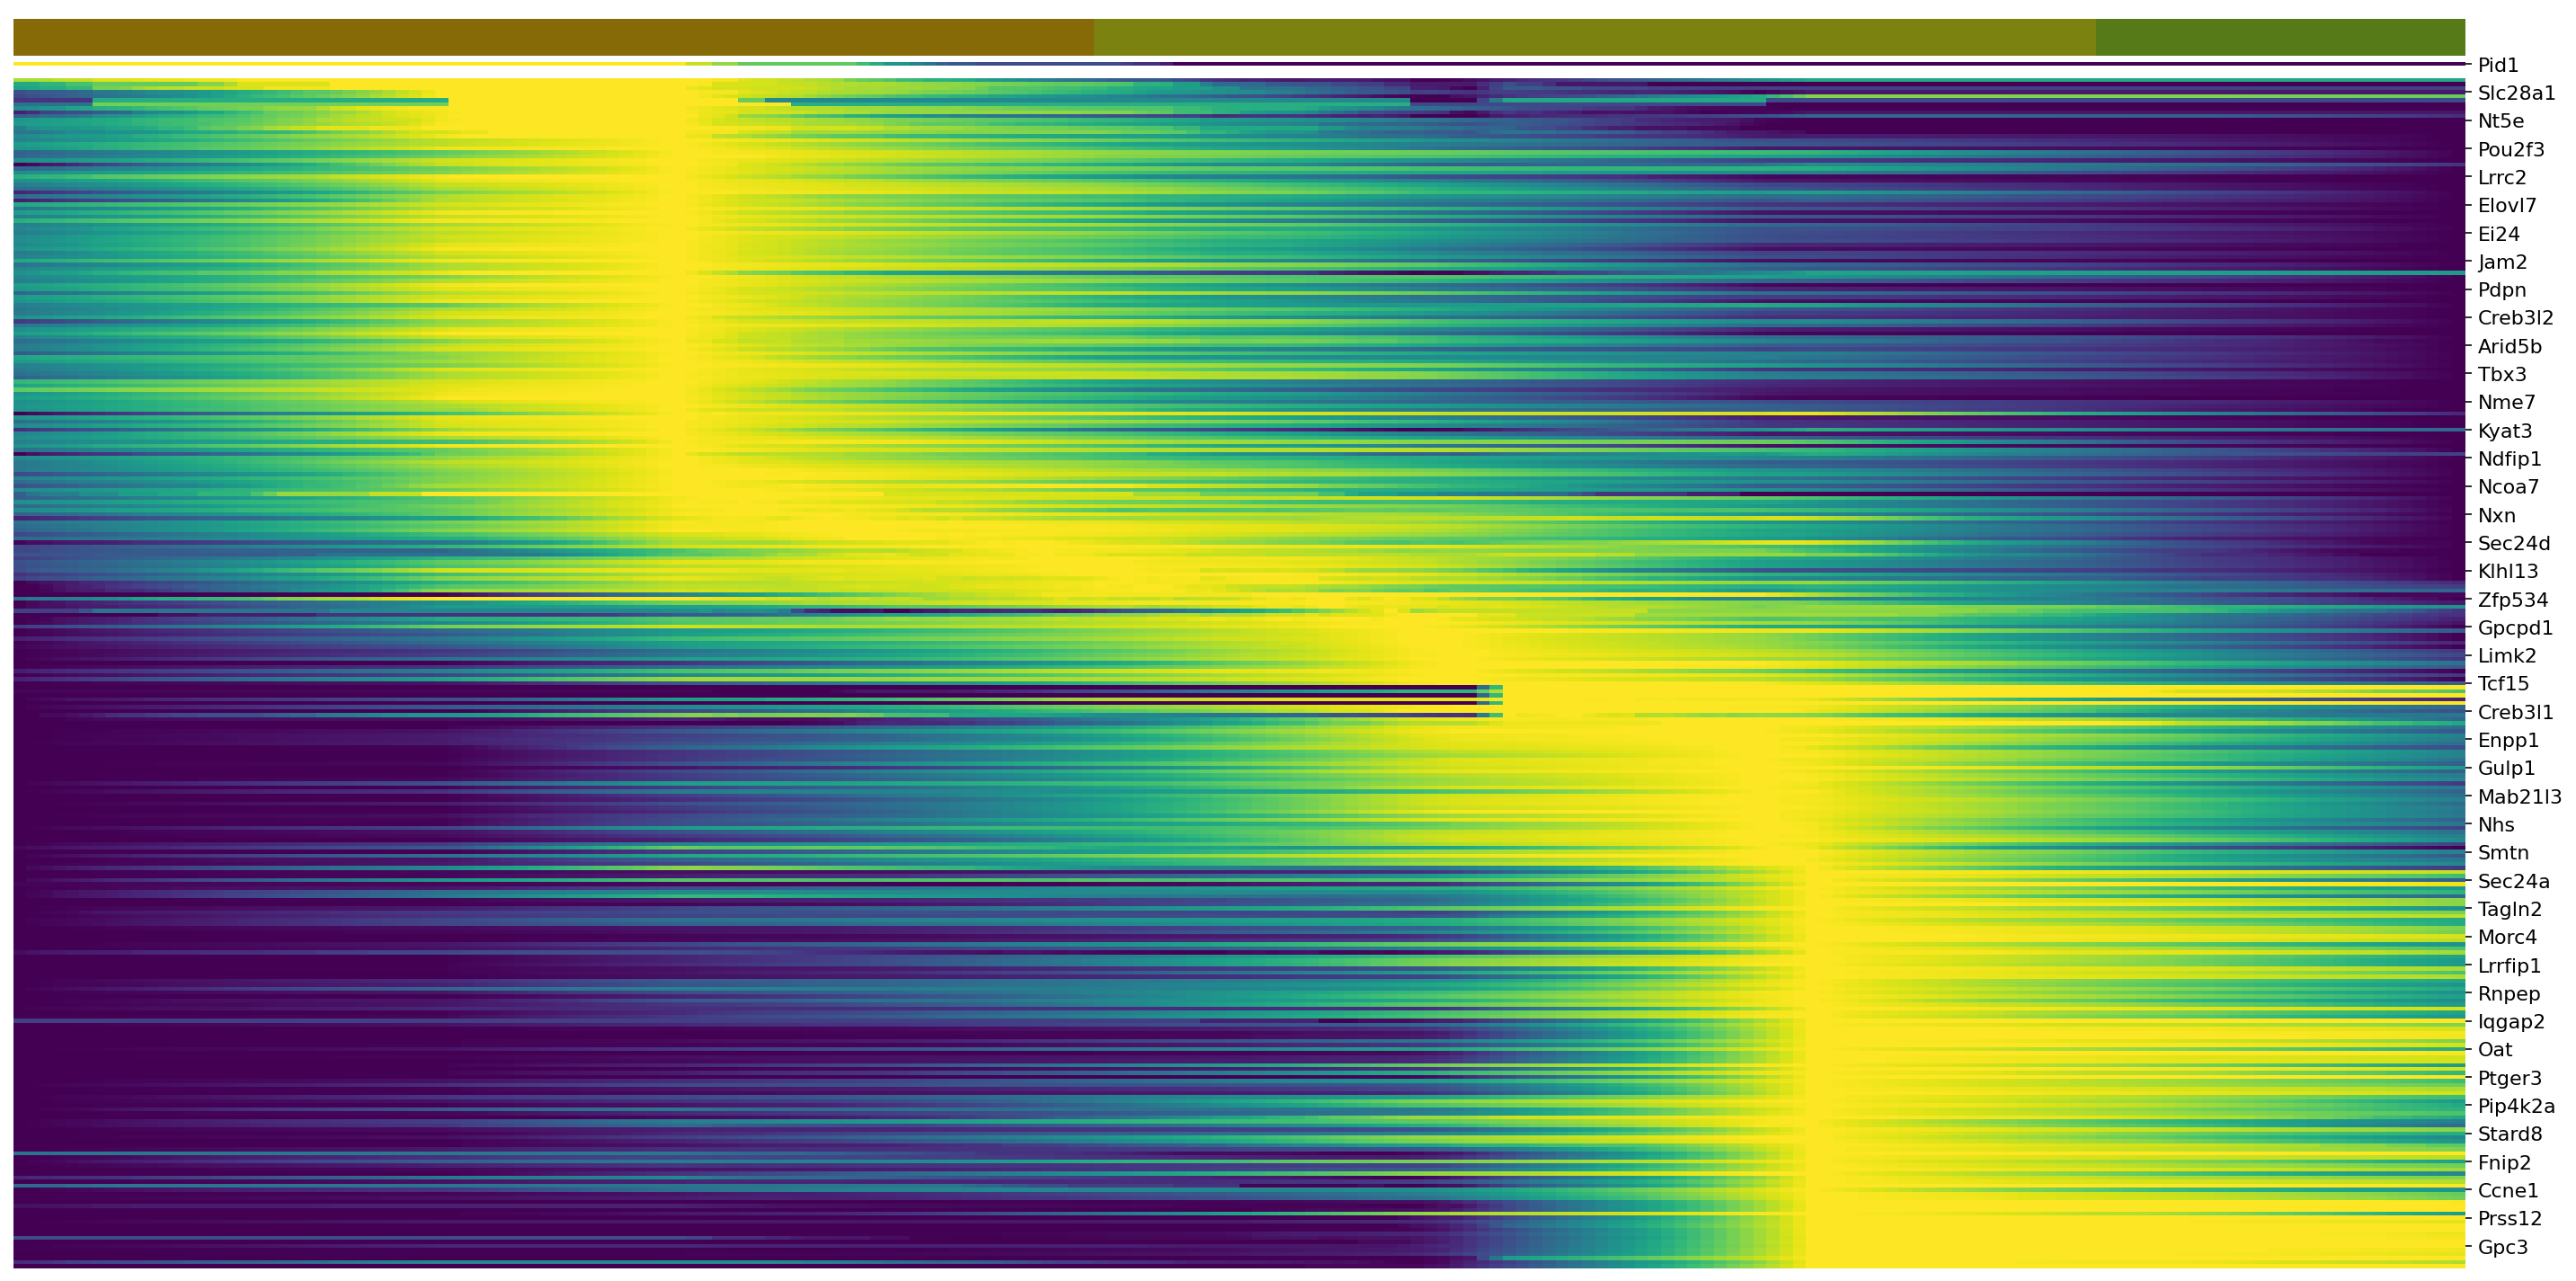

In [30]:
top_genes = adata_velocity.var['fit_likelihood'].sort_values(ascending=False).index[:300]
scv.pl.heatmap(adata_velocity, var_names=top_genes, sortby='latent_time', col_color='Time_CellType', n_convolve=100, figsize=[20, 10])

### Cluster-specific top-likelihood genes

In [31]:
scv.tl.rank_dynamical_genes(adata_velocity, groupby='Time_CellType')
df = scv.get_df(adata_velocity, 'rank_dynamical_genes/names')
df.head(20)

ranking genes by cluster-specific likelihoods
    finished (0:00:00) --> added 
    'rank_dynamical_genes', sorted scores by group ids (adata.uns)


ICM-E3.5   TE-E3.5  TE-E4.5
0       Srgn      Rgl1     Egfr
1       Tfpi      Gas6    Lama1
2       Pim2    Rhbdf2   Iqgap2
3      Bicc1     Apoa1     Amot
4     Platr3   Hsp90b1    Hnf1b
5      Pdzd4       Oat   Zfp462
6      Plod2  Atp6v0a1     Pdk1
7        Eda    Kdelr3    Clic6
8   Aldh18a1      Eml1     Elf5
9       Cubn      Nid2   Ptger3
10      Lgmn      Lgmn     Eml1
11      Atf3     Runx1    Wipf3
12    Rnf130   Creb3l1  Hsp90b1
13   Hsp90b1    Slc7a7   Slc7a8
14   Ldlrad3  Ankrd33b   Zfp948
15      Gas6     Prps2  Slc38a2
16     Plod3   Tfcp2l1  Cbfa2t3
17   Plekha2     Bcat1     Hpgd
18     Rdh11      Tle4      Efs
19      Cdh4     Hspg2    Gdpd5

### Extracting marker genes:

In [ ]:
adata.obs.Time_CellType.cat.categories

sc.get.rank_genes_groups_df(adata, "PrE-E4.5", log2fc_min=0.5, pval_cutoff=0.05)\
    .sort_values(by='logfoldchanges', ascending=False).names.to_numpy()

genes = "Tfec,Nostrin,Spink1,Iqgap2,Sox7,Podxl,Myo7a,Pth1r,Slc40a1,Clic5,Hnf1b,Ptpn14,Bag2,Eml1,Lgals2,Foxa2,Pga5,Fhl1,Hspg2,Rcn3,Has2,Cemip,Fam134b,Amn,Myo6,Pcbd1,Stard8,Bend5,Ctsh,AA986860,Flrt3,Srgn,Emb,Derl3,Cubn,Soat2,Gas6,Nrg1,Oat,Clic6,Lrp2,Cyp26a1,Atp6v0a1,2810459M11Rik,Ttr,Car2,Gpc3,Agpat4,Dab2,Mum1l1,Stard4,Kdelr3,Eps8,Camsap3,Pla2g12b,Pxdn,Lhx1,Col4a2,Pfkl,F2r,Htra1,Nid2,Epha2,Trip6,Ckap4,Clcn5,Col4a1,Serpinh1,Cited2,Maf,Cyp51,Susd3,Ctsz,P4hb,Apom,Hsp90b1,Zfp948,Gata4,Calr,Pdia6,Lama1,Dnajc3,Foxq1,Peg3,Dkk1,Sparc,Pdia3,Maged1,Rrbp1,Sdf2l1,Hspa5,Cldn6,Manf,Car4,Gramd1b,Cd81,Fgf5,Rhox6,Lgmn,Rdh11,Slc2a3,Amot,Sec61g,Hspb1,Dnajb11,Ldha,Itm2b,Rpn1,Ggta1,Agpat3,Shtn1,Cotl1,Lin28a,Eno1b,Txndc5,Tpcn1,Efna3,Ctsl,Stx3,Dapk2,Mydgf,Cltc,Glul,Apoe,Exoc6,Stx7,Unc5b,Lamc1,Lrpap1,Plod3,Slc9a3r1,Pcbp4,Dpp4,Pgk1,Slc7a7,Mvb12b,Mif,Atp2b1,Xbp1,Klhl2,Tmem51,Sec61b,Colgalt1,Hhex,Selenok,Mesdc2,Canx,Surf4,Eno1,Lamb1,Mgst3,Rps28,Ssr3,Bicc1,Pdia4,Creld2,Tmem256,Wbp5,Cited1,Tspan13,Gcsh,Stt3a,Tspan5,Pkm,Tfpi,Nxf7,Fkbp11,Ppib,Rps27rt,Dram1,Hyou1,Rhox5,Tspan9,Selenom,Xlr3a,Bex4,Card19,Plod2,Plscr1,Efnb1,Runx1,Tuba1b,Rras2,Dbi,Dnajc10,mt-Atp8,Vamp8,Ajuba,Ostc,Slc43a2,Neu1,Fam84b,Cep170b,Gna12,Myo18a,Gm10263,Galk1,Bbx,Slc25a22,Tpi1,Slc25a4,Fam198b,Dnmt3b,Mttp,Hdlbp,Tram1,Ppm1l,Mapk3,Rdx,Tmco1,Hmgn2,Dusp9,Plekha2,Herpud1,Id1,Slc16a1,Bex3,Mlec,Gdpd5,Hnf4a,Slc38a2,P4ha1,Reep5,Zfyve21,Insig1,Nmb,Hnrnpm,Selenos,Ehd1,Polg,Aldh18a1,Calu,Whsc1,Tuba1c,Sec61a1,Tmem160,Egfl7,Morf4l2,Acly,Akap9,Serp1,Atp2a2,Gorasp2,Wdr89,Agrn,Sec62,Dnmt3a,Gfpt1,Dgkk,Sccpdh,Slc9a6,Mme,Tubb5,Folr1,H1f0,Krtcap2,Slc26a2,Copb1,Slc29a1,Fasn,Ramp2,Ermp1,Tmem214,Msmo1,Tmem63b,Copa,Sc5d,Atp6v1a,S100a10,Nmt1,Fgf8,Atp6v1h,Zic3,Ifi30,Tnks2,Sqle,Dnmt3l,Meg3,Lman1,Gns,Mtus1,Snd1,Smco4,Ddx21,Tmed7,Mapkapk2,Tlk1,Atp6v1b2,Sec24a,Hmgcr,Slc16a13,Saraf,Gapdh,Ninj1,Marc2,Elovl1,Copb2,2210011C24Rik,Atp6ap1,Fads1,Fkbp9,Cgnl1,Samm50,H13,Foxo4,Dhcr24,Nxn,Acat2,Cyb5b,Clic1,Fam213a,Amotl2,Rpl36-ps3,Slc7a1,Sirt2,Nktr,Rbm47,Tmem181a,Acsl3,Sypl,Soat1,Mfsd12,Hk2,Far1,E130012a19rik,Clcn3,Sel1l,Slc25a1,Basp1,Gm10282,2200002D01Rik,Lamtor3,Tm9sf2,Tceal8,Aqp8,Fabp3,Hopx,Tnfrsf12a,Mdh1,Abcg2,Gm5786,Elovl5,Mdk,Hes1,Prr5,Cdkn3,Cyp4f14,Nptn,Tmem144,Pqlc2,Platr13,Tbc1d13,Slc1a5,Fabp3-ps1,Csrp2,Sigmar1,Rcan1,Pcyt2,Fgf3,Ebp,Nfxl1,Tubb6,Wsb2,Scd2,Nme2,Adk,Gm10036,AY036118,Dok2,Trim44,Ctsc,Nutf2,Uba52,Mvd,Glipr2,Fdps,Top2a,Fdft1,Hmgcs1,Gm10320,Mvk,Gm11273,Lefty1,Gclm,Mt1,Gm3550,Platr15,Loxl2,Tulp3,Kpna2,Tmem37,Hmgb3,Apoa1,Sult5a1,Ipp".split(',')

len(genes)

genes2 = sc.get.rank_genes_groups_df(adata, "PrE-E4.5", log2fc_min=0.5, pval_cutoff=0.05)\
    .sort_values(by='logfoldchanges', ascending=False).names.to_numpy()

len(genes2)

len(set(genes) & set(genes2))

In [ ]:
!jupyter nbconvert --to html 03_velocity-teresa.ipynb --output-dir="../reports"

### Conclusion

###### Working on the set of clusters specified above, we get OK velocity and see the trend of Esrrb being stable and Nanog downregulated in the E3.5 PrE founders. 

###### Clusters are: "E3.5:1","E3.5:0", "E3.5:4", "E4.5:0", "E4.5:1", corresponding to E3.5 ICM, E3.5PrE and E4.5 PrE (green, orange, brown, pink and gray on EE)

###### It is key to specify number of top variance genes to do the velocity on. Specifying 2000, will use all genes (will find ~800 valid genes to do vel on) and we see confusion of cell fate direction in the E3.5ICM. Both excluding this cluster and lowering the the top variance genes to 1000 (will find ~600 valid genes to do vel on), cleans the results up well. Here both were done..

###### For Epi, we had to specify n_top = 4000, to see Esrrb included at the same time as the directionality being reasonable (2000 does not include Esrrb, 2500 does, but latent time is off/ confused*, improves as n_top is increased, but only seem meaning full when n_top reached 4000). *The increase in n_top = [>2000:>4000] manifest as confusion (higher resolution?) of the directionality of the E3.5 ICM

In [4]:
!pip list

Package                       Version
----------------------------- -----------
anndata                       0.7.8
annoy                         1.17.0
argcomplete                   2.0.0
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
async-generator               1.10
attrs                         21.4.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.zoneinfo            0.2.1
bbknn                         1.5.1
bleach                        4.1.0
cached-property               1.5.2
certifi                       2021.10.8
cffi                          1.15.0
charset-normalizer            2.0.12
click                         8.0.3
cmake                         3.22.1
cycler                        0.11.0
Cython                        0.29.26
debugpy                       1.5.1
decorator                     5.1.1
defusedxml                    0.7.1
Deprecated                    1.2.12
dtw-python                    1.1.12
entry